In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel(r"C:\Users\BUSE\Desktop\PUSULA TALENT ACADEMY\Talent_Academy_Case_DT_2025.xlsx")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2235 entries, 0 to 2234
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   HastaNo          2235 non-null   int64 
 1   Yas              2235 non-null   int64 
 2   Cinsiyet         2066 non-null   object
 3   KanGrubu         1560 non-null   object
 4   Uyruk            2235 non-null   object
 5   KronikHastalik   1624 non-null   object
 6   Bolum            2224 non-null   object
 7   Alerji           1291 non-null   object
 8   Tanilar          2160 non-null   object
 9   TedaviAdi        2235 non-null   object
 10  TedaviSuresi     2235 non-null   object
 11  UygulamaYerleri  2014 non-null   object
 12  UygulamaSuresi   2235 non-null   object
dtypes: int64(2), object(11)
memory usage: 227.1+ KB


In [4]:
df.head()

HastaNo  Yas Cinsiyet KanGrubu    Uyruk  \
0   145134   60    Kadın    0 Rh+  Türkiye   
1   145135   28    Erkek    0 Rh+  Türkiye   
2   145135   28    Erkek    0 Rh+  Türkiye   
3   145135   28    Erkek    0 Rh+  Türkiye   
4   145135   28    Erkek    0 Rh+  Türkiye   

                                      KronikHastalik  \
0  Becker Musküler Distrofisi, Hiportiroidizm, Ka...   
1  Duchenne Musküler Distrofisi, Myastenia gravis...   
2  Duchenne Musküler Distrofisi, Myastenia gravis...   
3  Duchenne Musküler Distrofisi, Myastenia gravis...   
4  Duchenne Musküler Distrofisi, Myastenia gravis...   

                                            Bolum Alerji  \
0  Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi    TOZ   
1  Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi    NaN   
2  Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi    NaN   
3  Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi    NaN   
4  Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi    NaN   

                                             Tanilar  \
0         Ayak bileği ve ayağın yüzeysel yaralanması   
1  Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...   
2  Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...   
3  Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...   
4  Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...   

                         TedaviAdi TedaviSuresi UygulamaYerleri UygulamaSuresi  
0                      Ayak Bileği      5 Seans     Ayak Bileği      20 Dakika  
1  Dorsalji -Boyun+trapez+skapular     15 Seans           Boyun      20 Dakika  
2  Dorsalji -Boyun+trapez+skapular     15 Seans      Boyun,Sırt      20 Dakika  
3  Dorsalji -Boyun+trapez+skapular     15 Seans           Boyun       5 Dakika  
4  Dorsalji -Boyun+trapez+skapular     15 Seans      Boyun,Sırt      20 Dakika

In [10]:
df["TedaviSuresi"].unique()

array(['5 Seans', '15 Seans', '10 Seans', '18 Seans', '20 Seans',
       '2 Seans', '6 Seans', '4 Seans', '30 Seans', '11 Seans',
       '16 Seans', '21 Seans', '1 Seans', '8 Seans', '3 Seans', '7 Seans',
       '19 Seans', '29 Seans', '14 Seans', '17 Seans', '25 Seans',
       '22 Seans', '37 Seans'], dtype=object)

In [11]:
df["UygulamaSuresi"].unique()

array(['20 Dakika', '5 Dakika', '30 Dakika', '15 Dakika', '10 Dakika',
       '45 Dakika', '25 Dakika', '3 Dakika', '40 Dakika', '8 Dakika'],
      dtype=object)

In [5]:
missing_values = pd.DataFrame({
    "Eksik Değer Toplamı": df.isnull().sum(),
    "Eksik Değer Yüzdesi": (df.isnull().sum() / len(df)) * 100
})

missing_values = missing_values[missing_values["Eksik Değer Toplamı"] > 0]
missing_values

Eksik Değer Toplamı  Eksik Değer Yüzdesi
Cinsiyet                         169             7.561521
KanGrubu                         675            30.201342
KronikHastalik                   611            27.337808
Bolum                             11             0.492170
Alerji                           944            42.237136
Tanilar                           75             3.355705
UygulamaYerleri                  221             9.888143

In [6]:
df.describe().T

count           mean         std       min       25%       50%  \
HastaNo  2235.0  145333.100224  115.214248  145134.0  145235.0  145331.0   
Yas      2235.0      47.327069   15.208634       2.0      38.0      46.0   

              75%       max  
HastaNo  145432.0  145537.0  
Yas          56.0      92.0

In [7]:
categorical_columns = df.select_dtypes(include="object").columns.to_list()

for col in categorical_columns:
    if col in df.columns:
        print(df[col].value_counts())

Cinsiyet
Kadın    1274
Erkek     792
Name: count, dtype: int64
KanGrubu
0 Rh+     579
A Rh+     540
B Rh+     206
AB Rh+     80
B Rh-      68
A Rh-      53
0 Rh-      26
AB Rh-      8
Name: count, dtype: int64
Uyruk
Türkiye       2173
Tokelau         27
Arnavutluk      13
Azerbaycan      12
Libya           10
Name: count, dtype: int64
KronikHastalik
Myastenia gravis                                                                38
Aritmi                                                                          36
Fascioscapulohumeral Distrofi                                                   36
Hipertiroidizm                                                                  34
Limb-Girdle Musküler Distrofi, Astım                                            34
                                                                                ..
Aritmi, Diyabet, Kalp yetmezliği, Hiportiroidizm                                 1
Fascioscapulohumeral Distrofi, Hiportiroidizm, Limb-Girdle Musküler

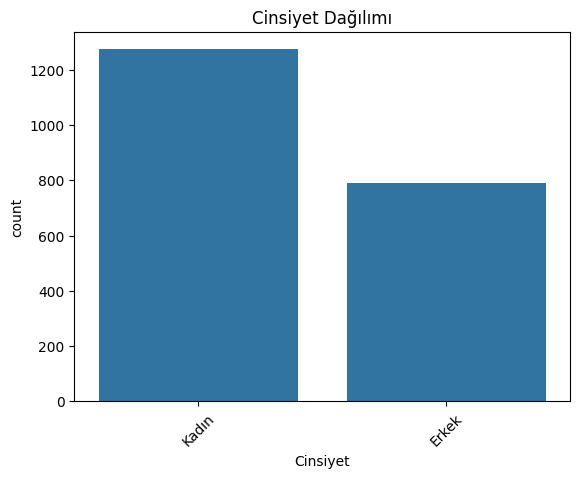

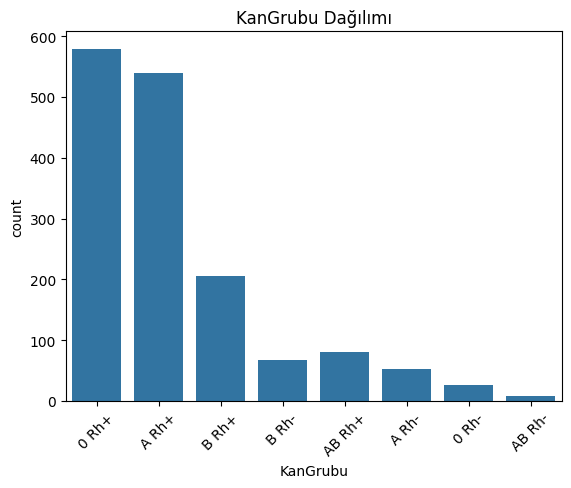

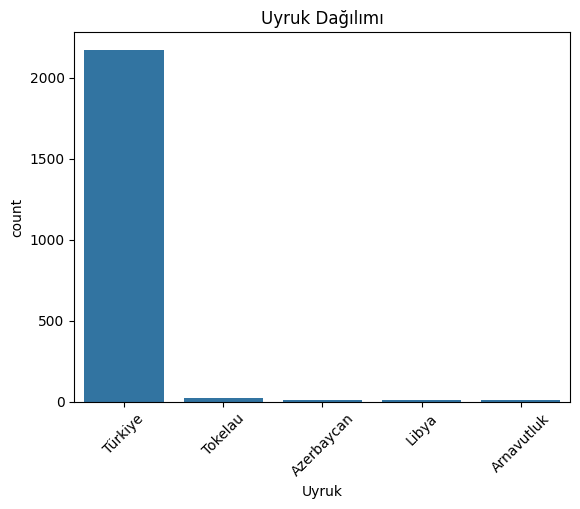

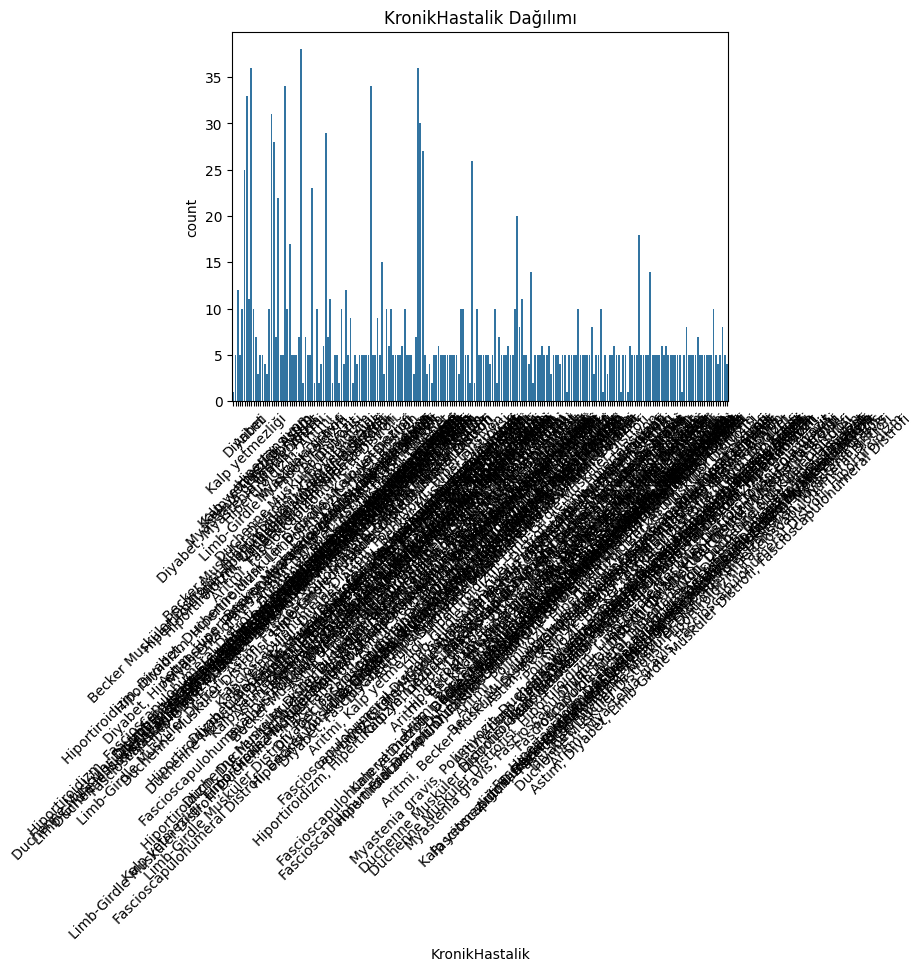

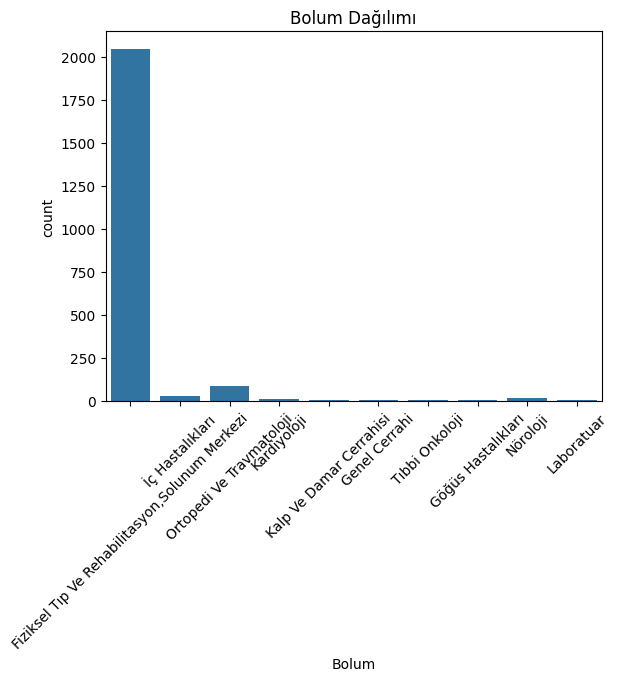

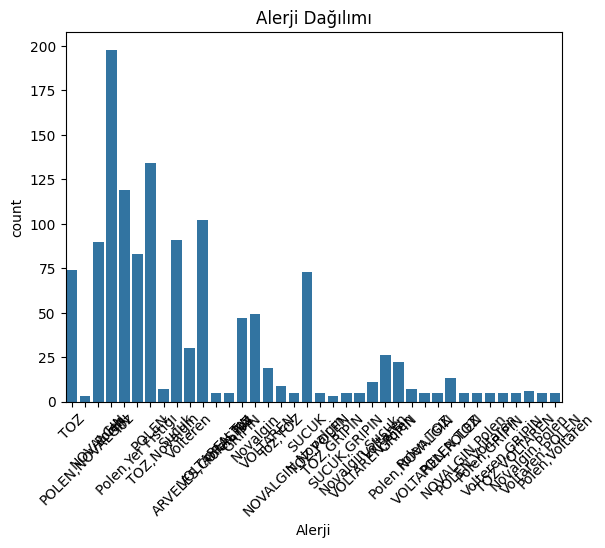

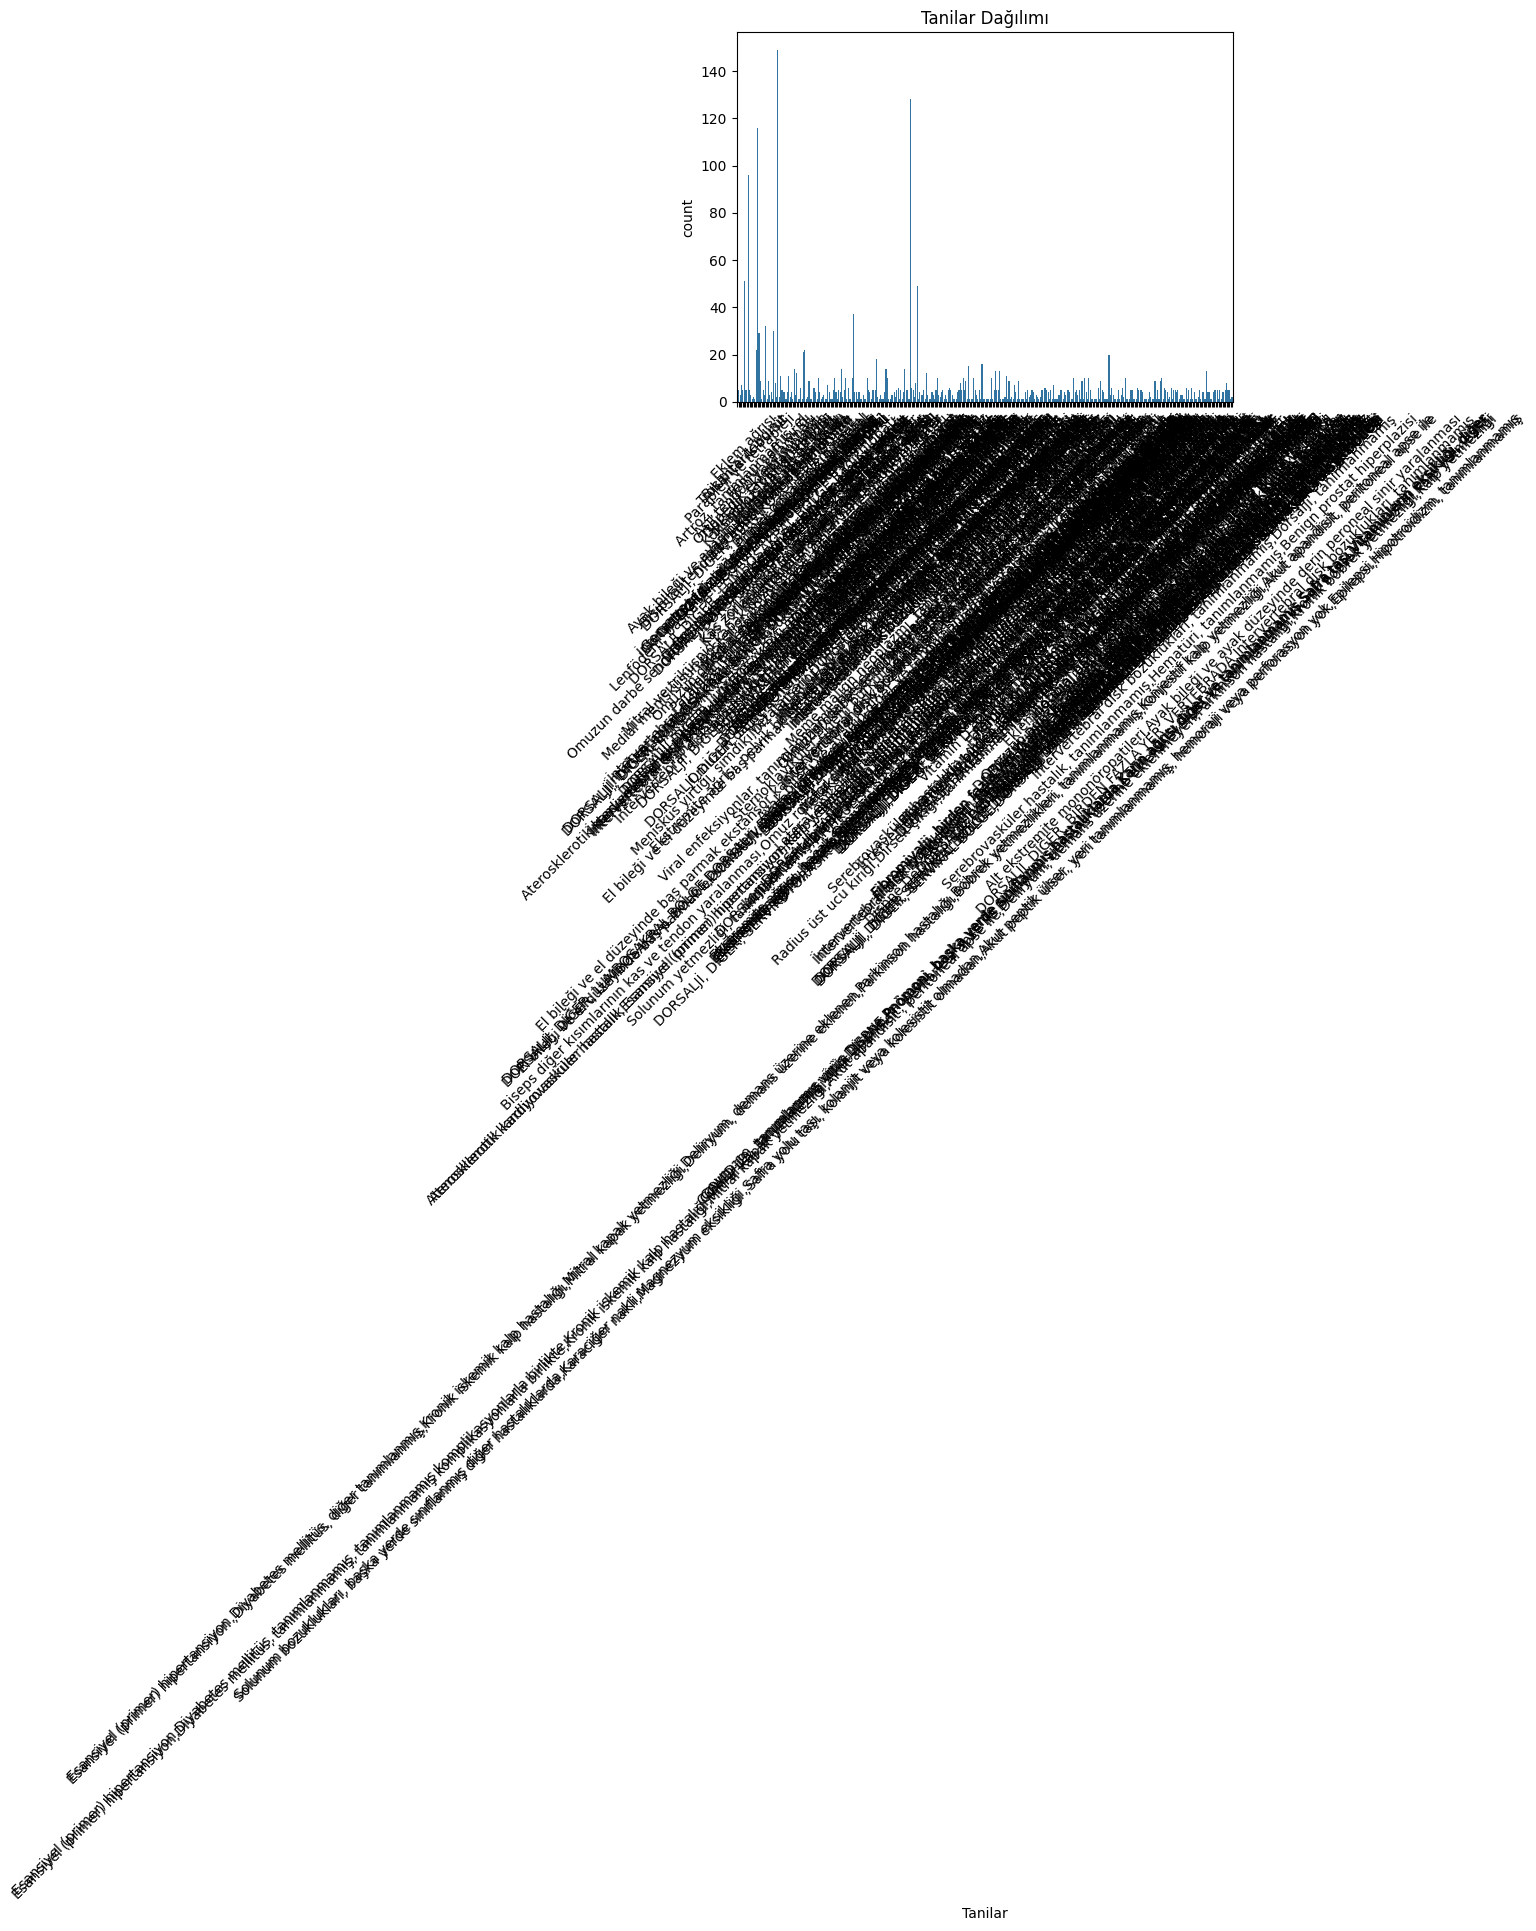

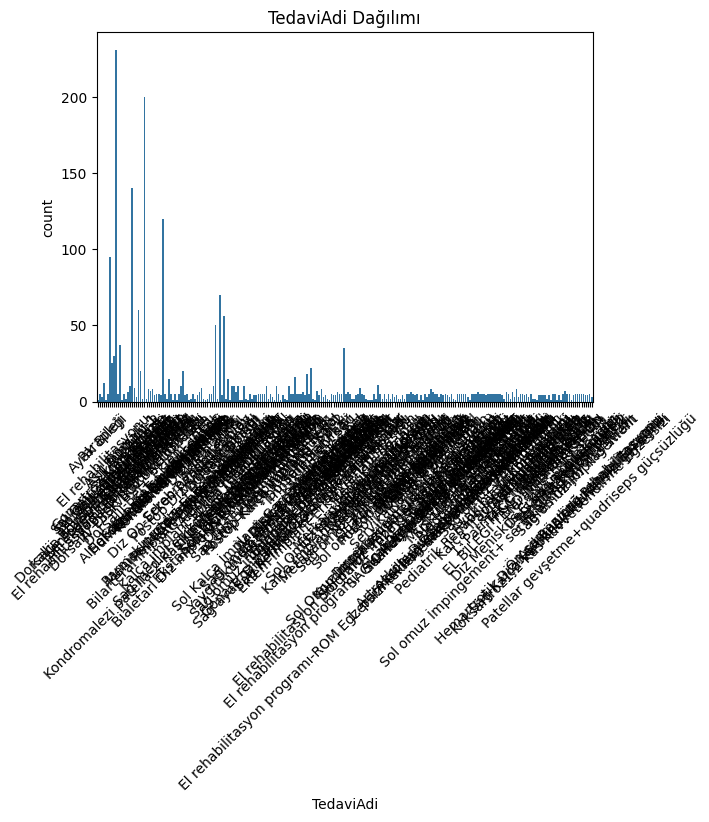

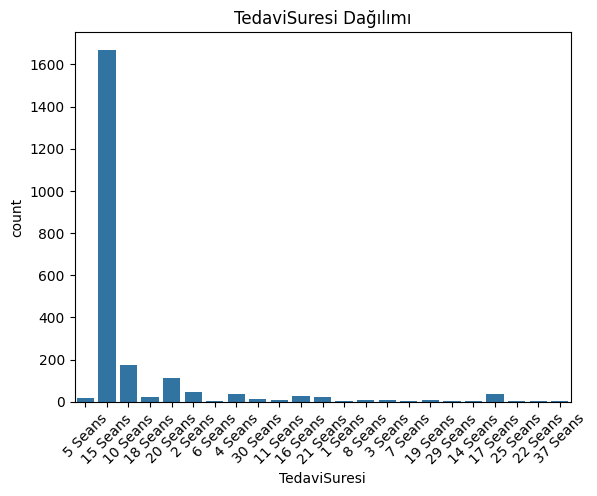

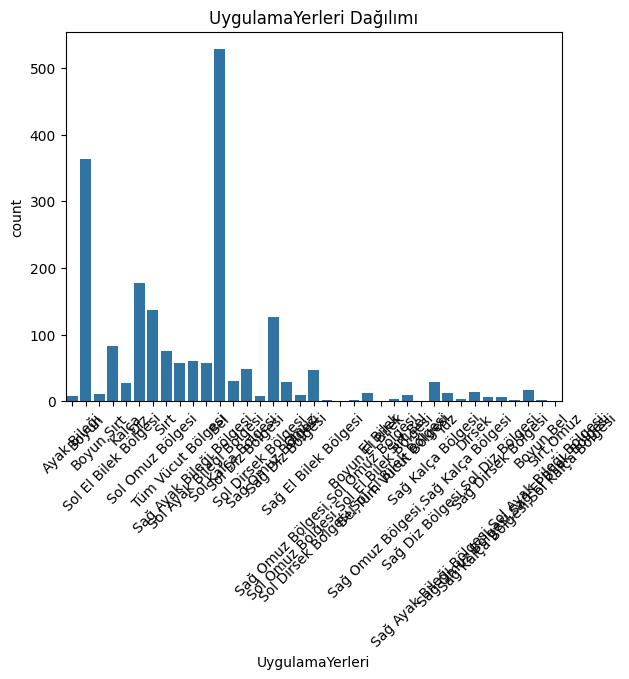

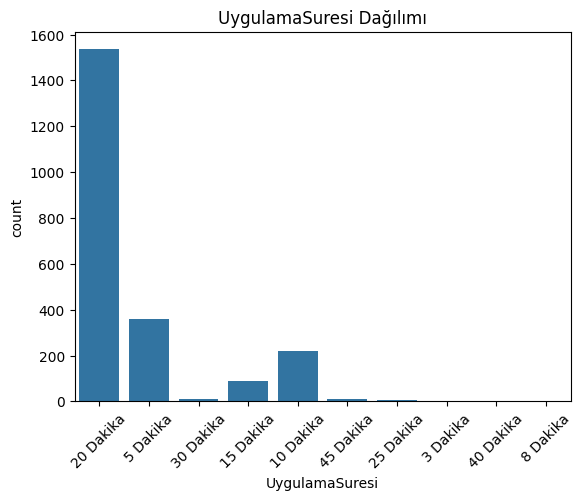

In [9]:
for col in categorical_columns:
    sns.countplot(x=col, data=df)
    plt.title(f"{col} Dağılımı")
    plt.xticks(rotation=45)
    plt.show()

In [10]:
df["KronikHastalik"].value_counts()

KronikHastalik
Myastenia gravis                                                                38
Aritmi                                                                          36
Fascioscapulohumeral Distrofi                                                   36
Hipertiroidizm                                                                  34
Limb-Girdle Musküler Distrofi, Astım                                            34
                                                                                ..
Aritmi, Diyabet, Kalp yetmezliği, Hiportiroidizm                                 1
Fascioscapulohumeral Distrofi, Hiportiroidizm, Limb-Girdle Musküler Distrofi     1
Fascioscapulohumeral Distrofi, Myastenia gravis                                  1
Polimiyozit, Diyabet, Becker Musküler Distrofisi                                 1
Becker Musküler Distrofisi, Hiportiroidizm, Kalp yetmezliği                      1
Name: count, Length: 220, dtype: int64

In [11]:
df["Tanilar"].value_counts()

Tanilar
DORSALJİ, DİĞER, LUMBOSAKRAL BÖLGE                                                                        149
Omuzun darbe sendromu                                                                                     128
İntervertebral disk bozuklukları, tanımlanmamış                                                           116
DORSALJİ, DİĞER, SERVİKOTORASİK BÖLGE                                                                      96
Eklem ağrısı                                                                                               51
                                                                                                         ... 
Fibromiyalji , birden fazla yer,DORSALJİ, DİĞER, SERVİKOTORASİK BÖLGE                                       1
İntervertebral disk bozuklukları, tanımlanmamış                                                             1
İntervertebral disk bozuklukları,,  tanımlanmamış                                                           1
Sp

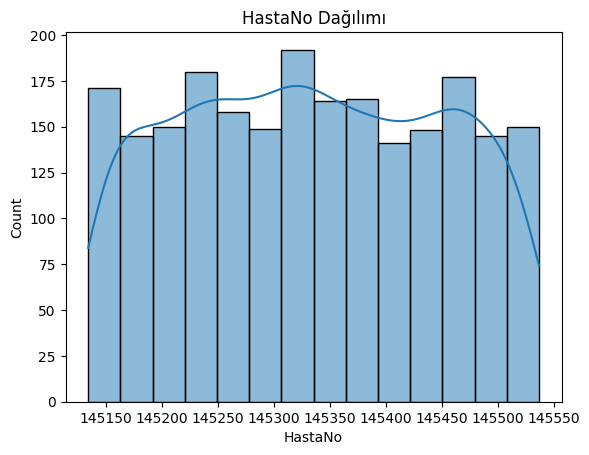

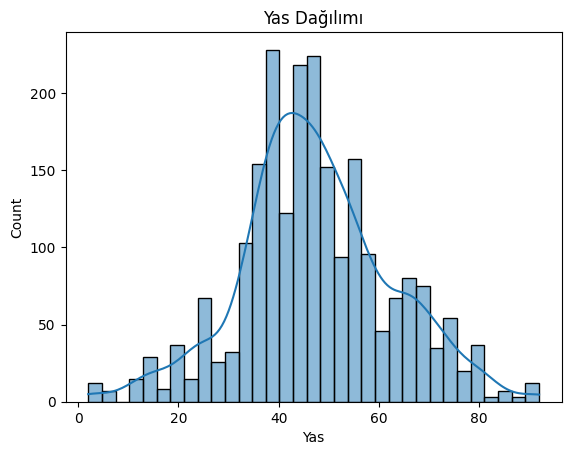

In [12]:
numerical_columns = df.select_dtypes(include="number").columns.to_list()

for col in numerical_columns:
    if col in df.columns:
        sns.histplot(df[col], kde=True)
        plt.title(f"{col} Dağılımı")
        plt.show()

In [20]:
sub = df[["HastaNo", "KronikHastalik"]].dropna(subset=["KronikHastalik"]).copy()

sub["KronikHastalik"] = sub["KronikHastalik"].astype(str).str.replace(r"\s*, \s*", ",", regex=True)
sub["KronikHastalik_List"] = sub["KronikHastalik"].str.split(",")

sub = sub.explode("KronikHastalik_List")

sub = sub.drop_duplicates(["HastaNo", "KronikHastalik_List"])
sub[["HastaNo", "KronikHastalik_List"]].head(10)

HastaNo           KronikHastalik_List
0   145134    Becker Musküler Distrofisi
0   145134                Hiportiroidizm
0   145134               Kalp yetmezliği
1   145135  Duchenne Musküler Distrofisi
1   145135              Myastenia gravis
1   145135    Becker Musküler Distrofisi
1   145135                 Hipertansiyon
9   145137                Hiportiroidizm
9   145137                       Diyabet
9   145137  Duchenne Musküler Distrofisi

In [ ]:
def explode_column(df, id_col, col, sep_pattern=r"[,+\-]"):
  
    sub = df[[id_col, col]].dropna(subset=[col]).copy()
    sub[col] = sub[col].astype(str)

    sub[col] = sub[col].str.replace(r'\s*[\+\-]\s*', ',', regex=True)

    sub[col] = sub[col].str.replace(r'\s*,\s*', ',', regex=True)

    sub[col] = sub[col].str.replace(r',+', ',', regex=True)

    sub[col] = sub[col].str.strip(' ,')

    sub[col + "_List"] = sub[col].str.split(',')

    sub = sub.explode(col + "_List")

    sub = sub.drop_duplicates([id_col, col + "_List"]).reset_index(drop=True)

    return sub[[id_col, col + "_List"]]

multi_cols = ["KronikHastalik", "Bolum", "Alerji", "Tanilar", "TedaviAdi", "UygulamaYerleri"]

long_dfs = {}
for c in multi_cols:
    if c in df.columns:
        long_dfs[c] = explode_column(df, "HastaNo", c)

print(long_dfs["TedaviAdi"].head(10))


   HastaNo      TedaviAdi_List
0   145134         Ayak Bileği
1   145135            Dorsalji
2   145135               Boyun
3   145135              trapez
4   145135            skapular
5   145136           Parapleji
6   145137  El rehabilitasyonu
7   145137  El Rehabilitasyonu
8   145137        kalça ağrısı
9   145137  trokanterik bursit


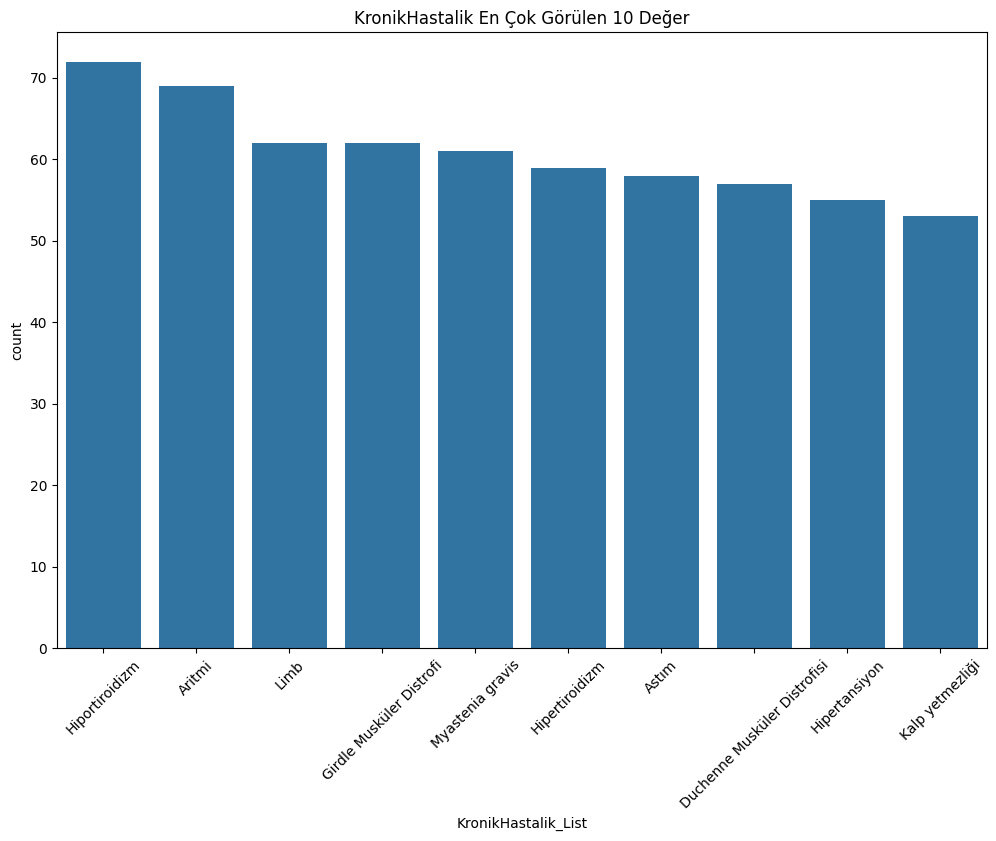

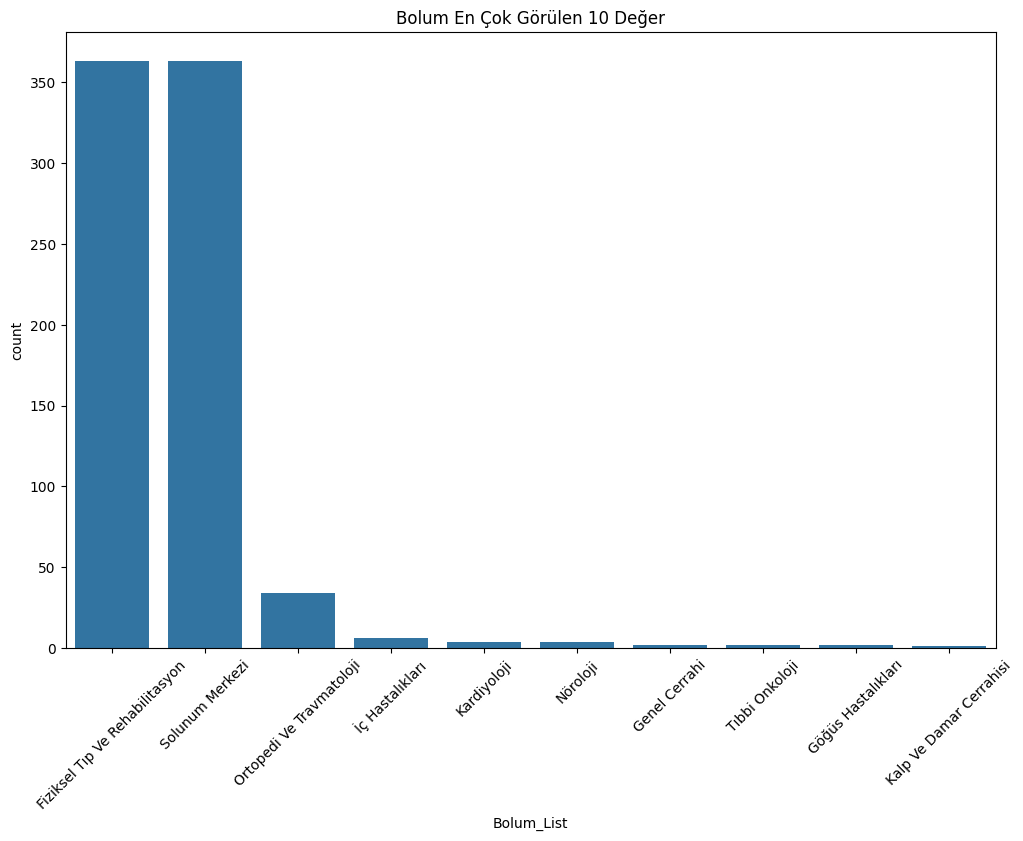

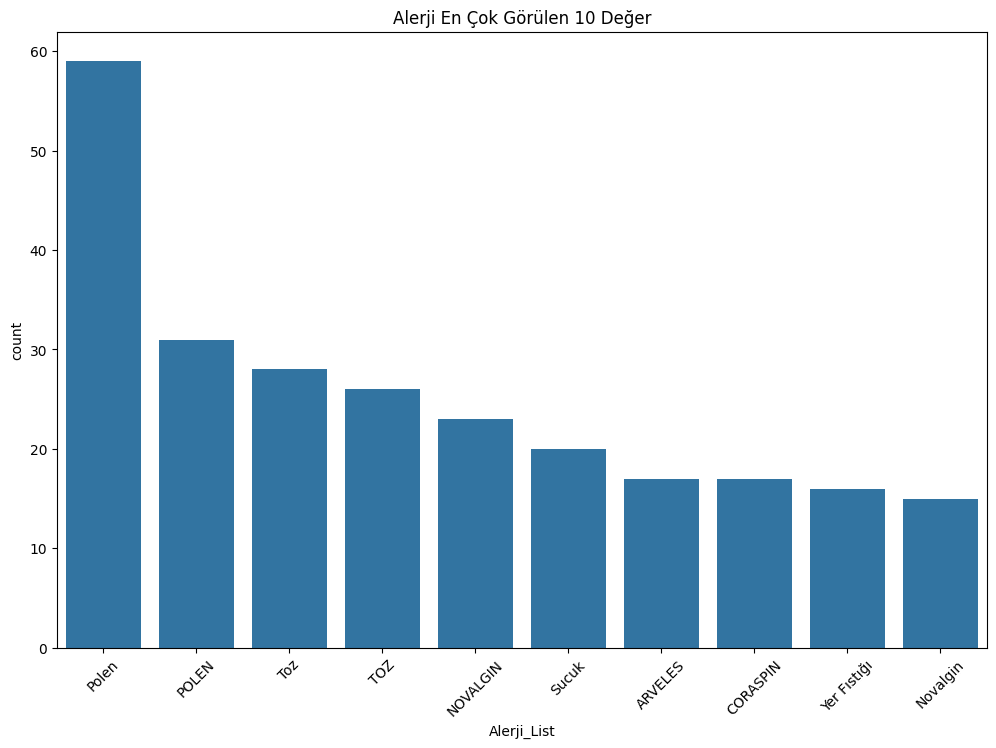

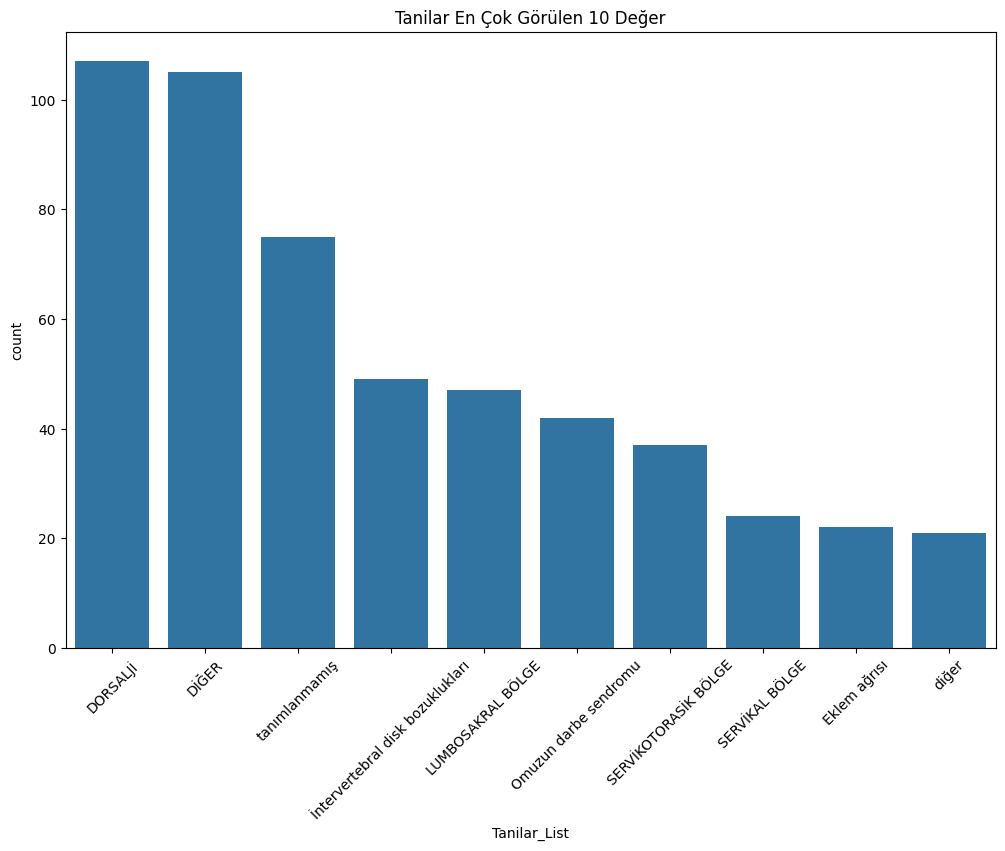

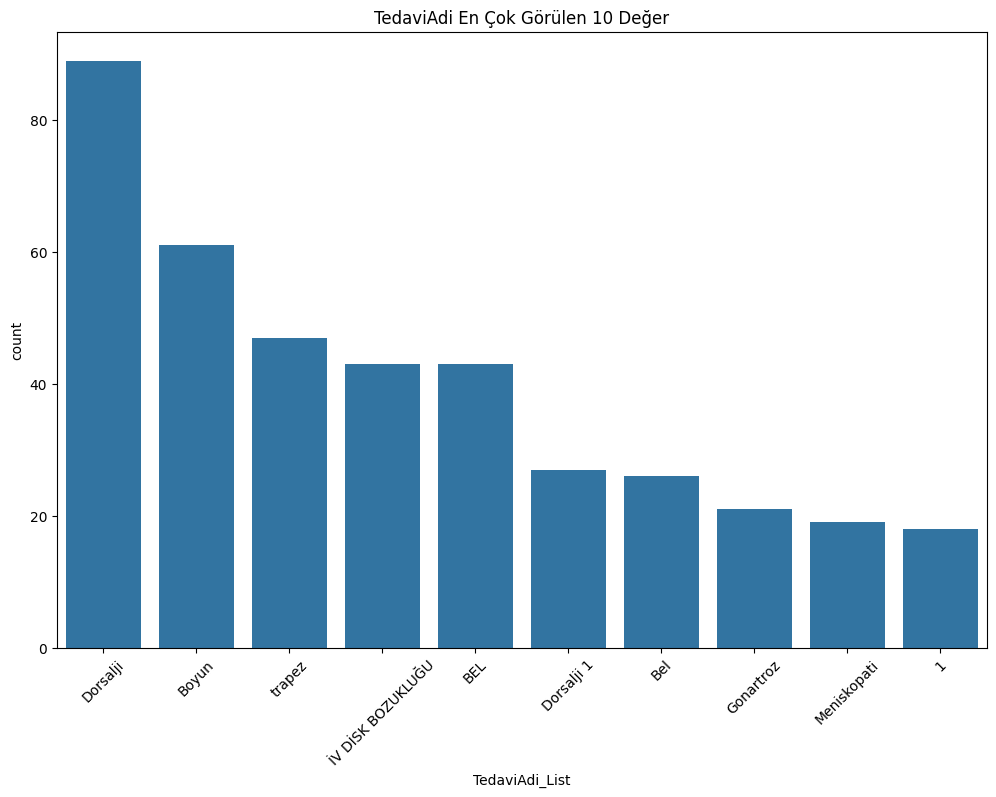

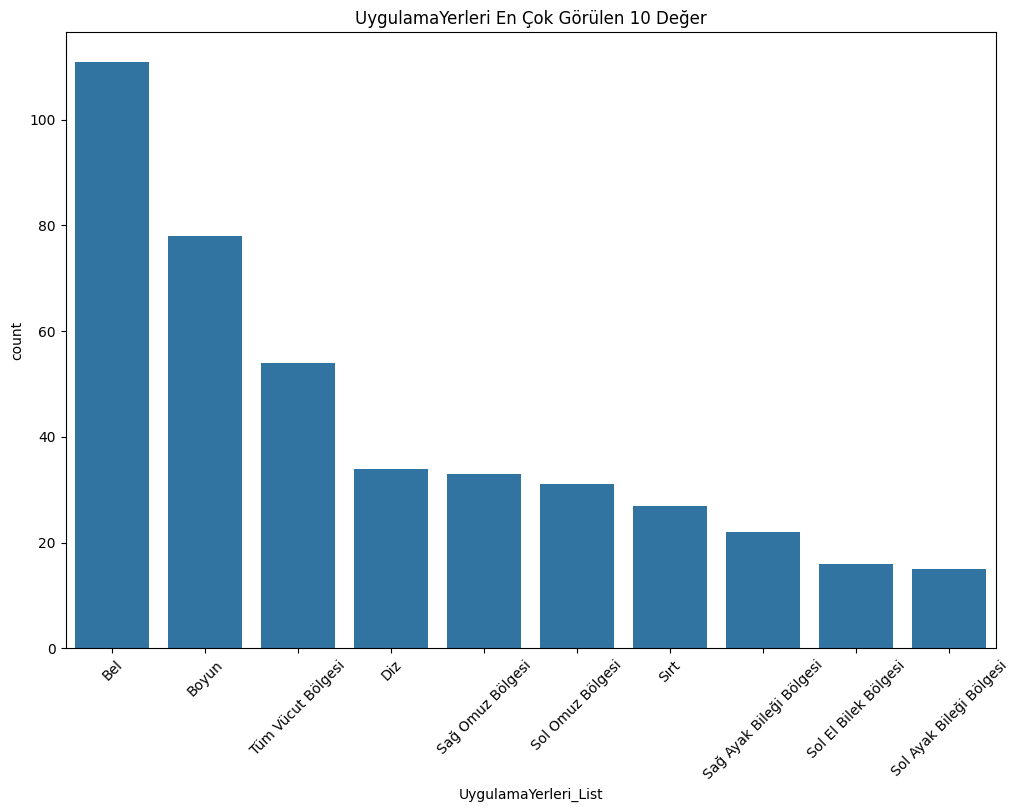

In [6]:
for c in multi_cols:
    if c in long_dfs:
        plt.figure(figsize=(12, 8))

        col_list = c + "_List"

        top10 = long_dfs[c][col_list].value_counts().head(10).index

        sns.countplot(data=long_dfs[c], x=col_list, order=top10)
        plt.xticks(rotation=45)
        plt.title(f"{c} En Çok Görülen 10 Değer")
        plt.show()

In [ ]:
# MULTİ DEĞİŞKENLER İLE DİĞER OBJECT DEĞİŞKENLER ARASINDAKİ İLİŞKİ GRAFİKLERİ

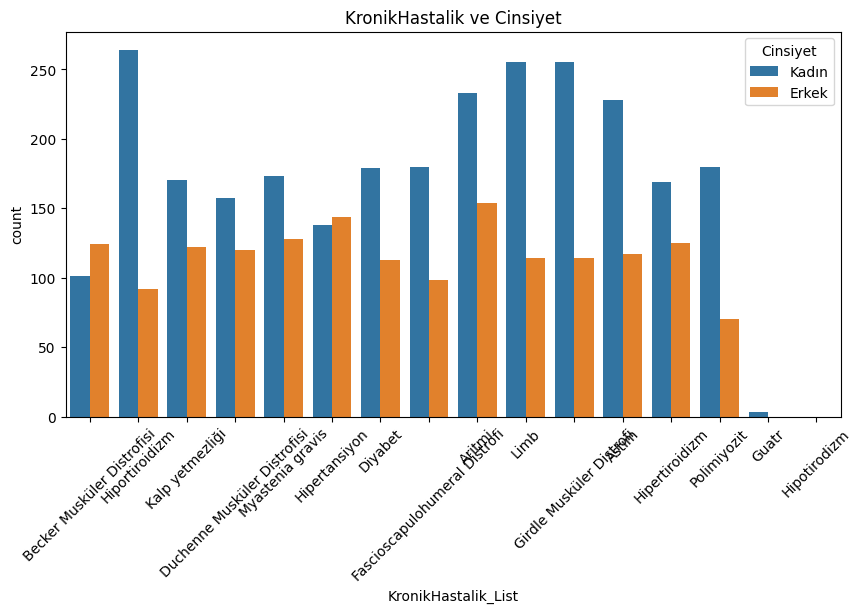

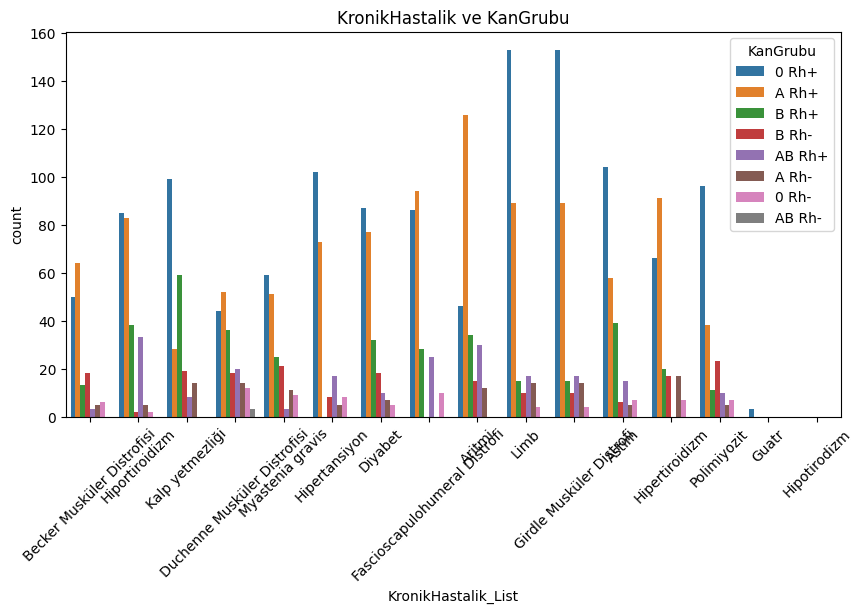

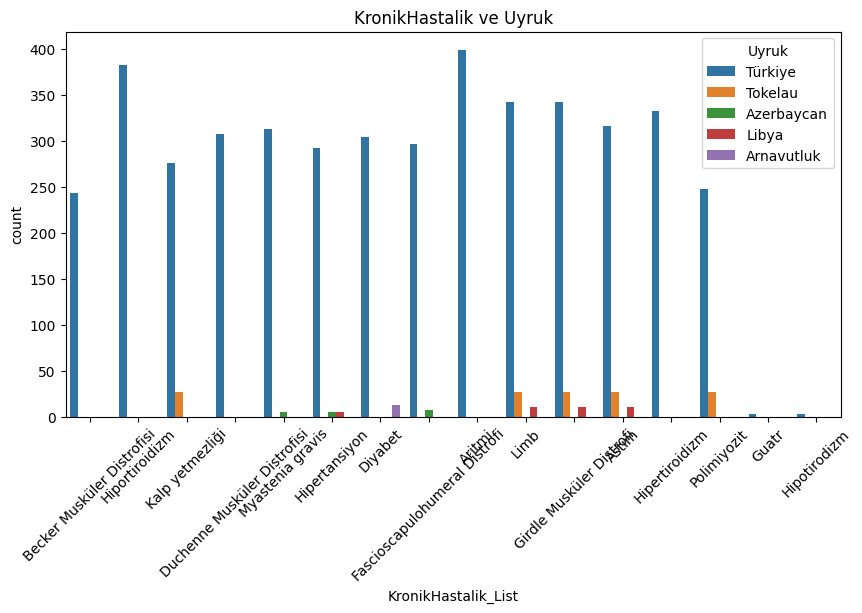

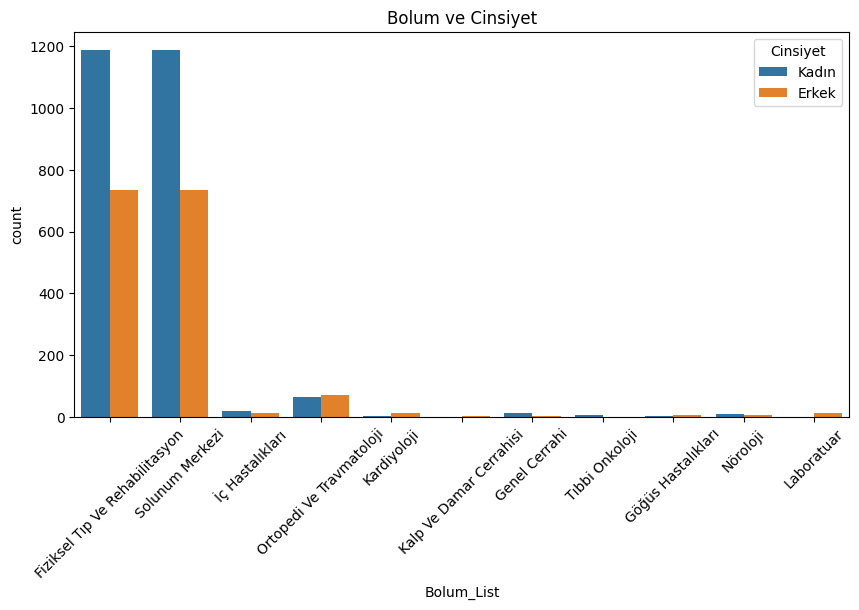

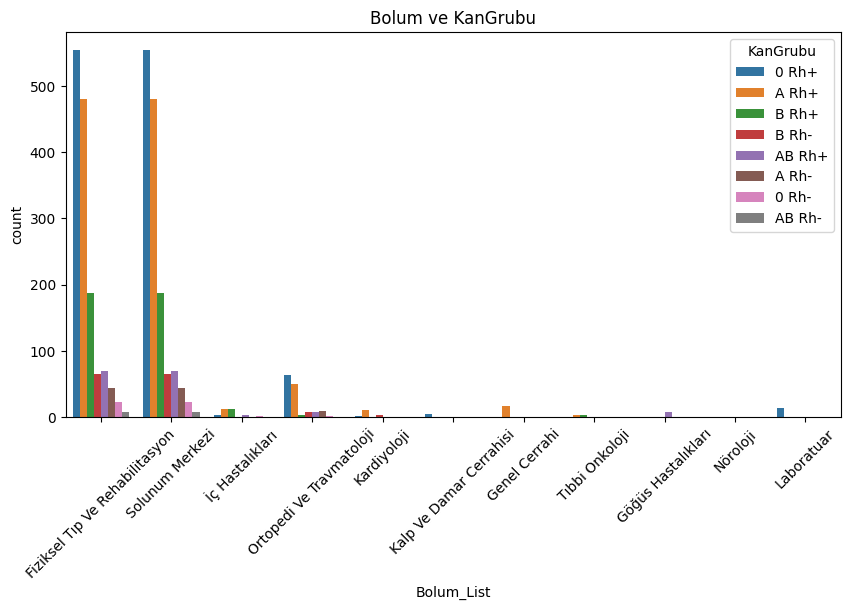

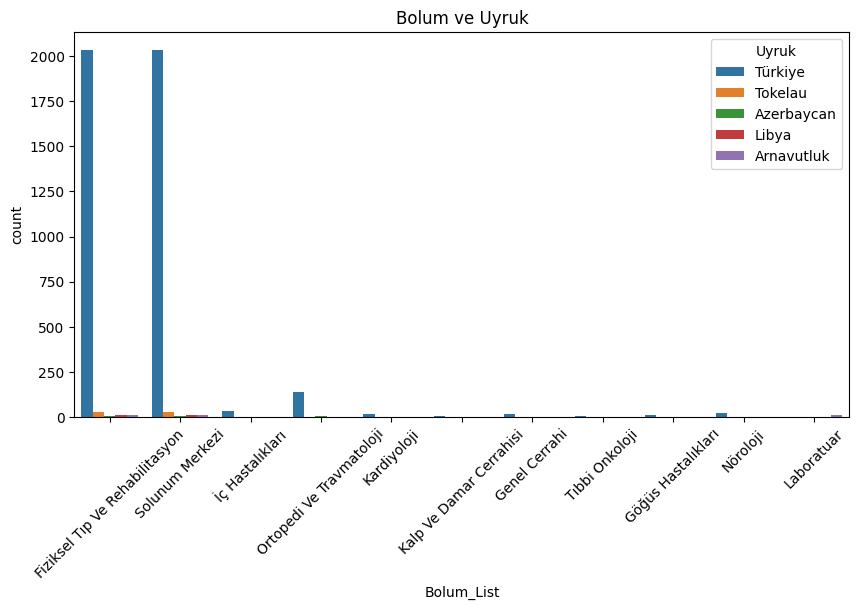

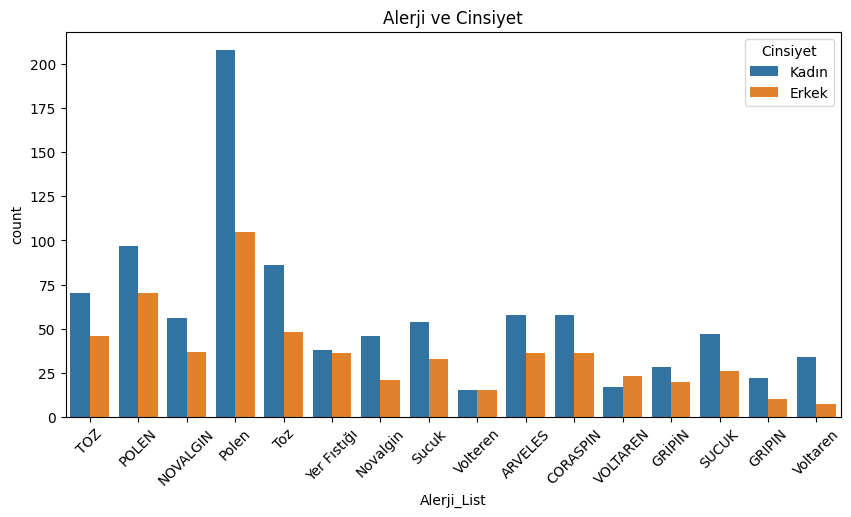

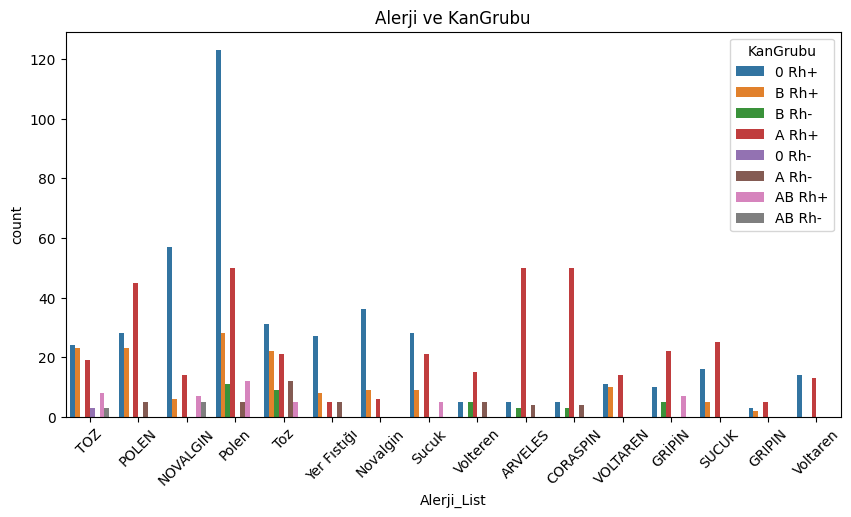

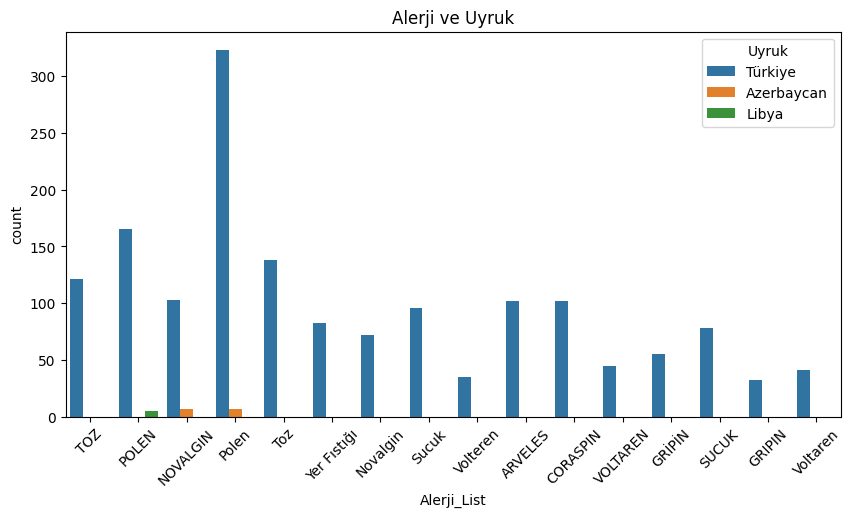

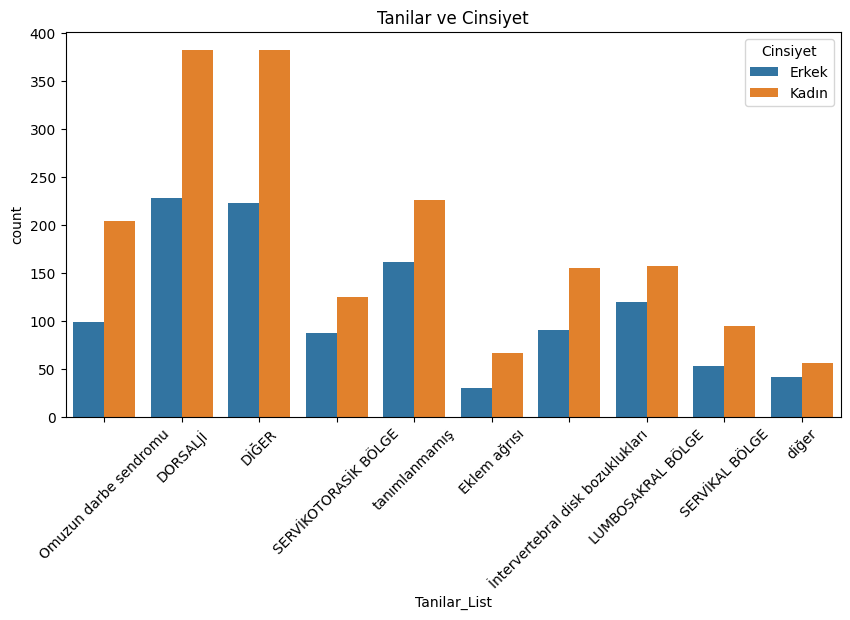

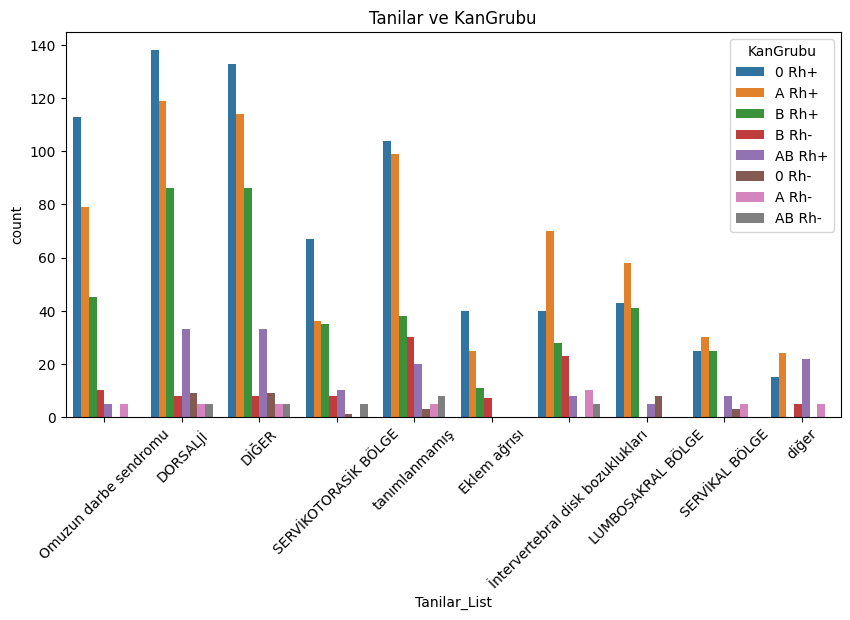

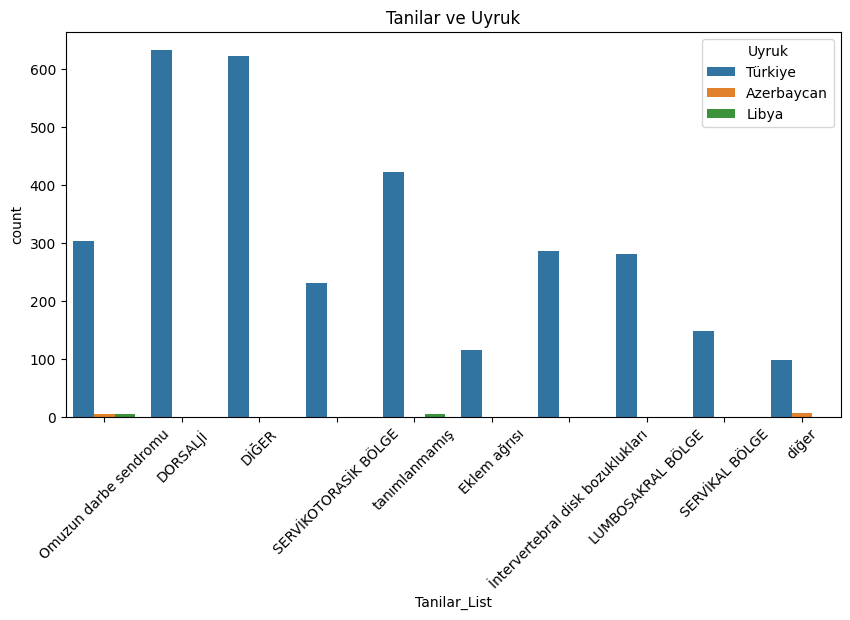

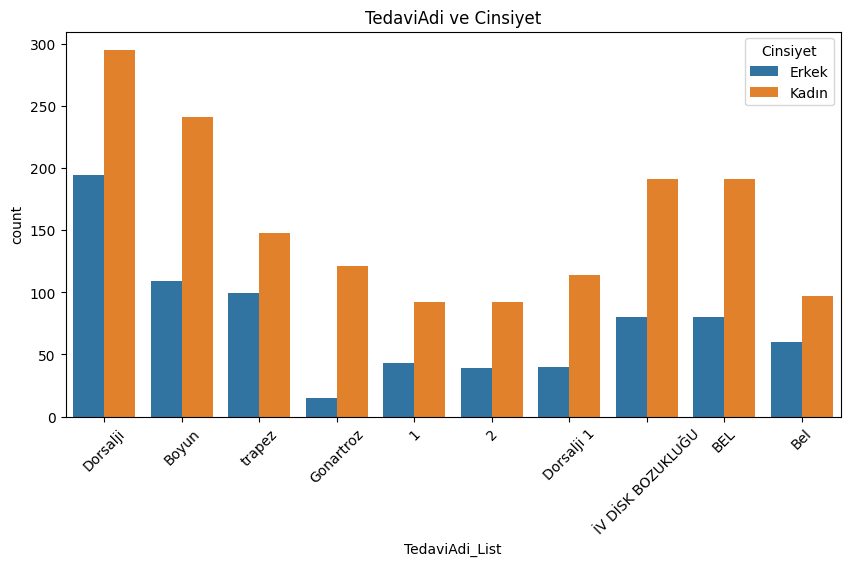

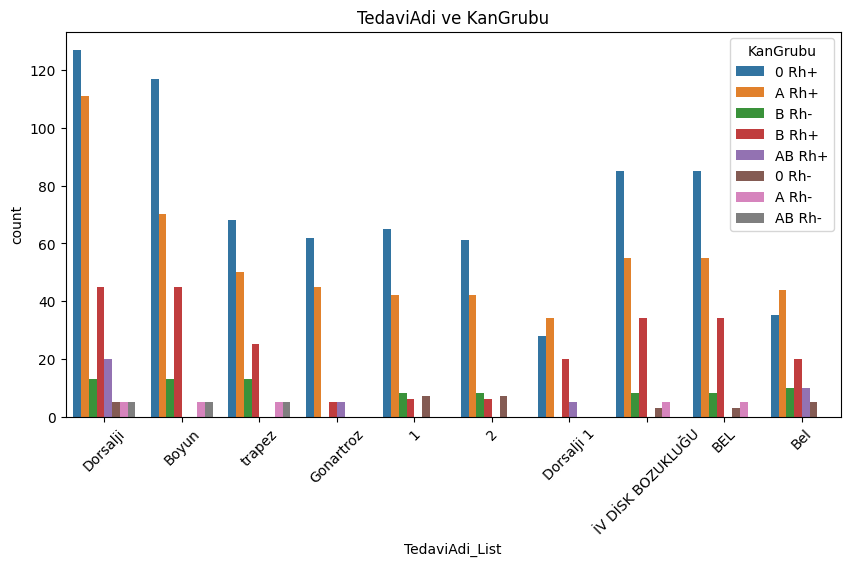

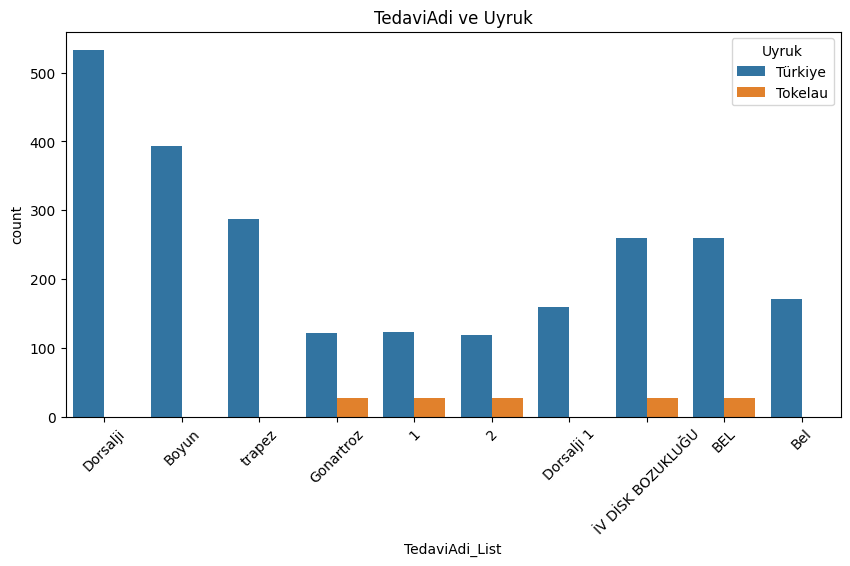

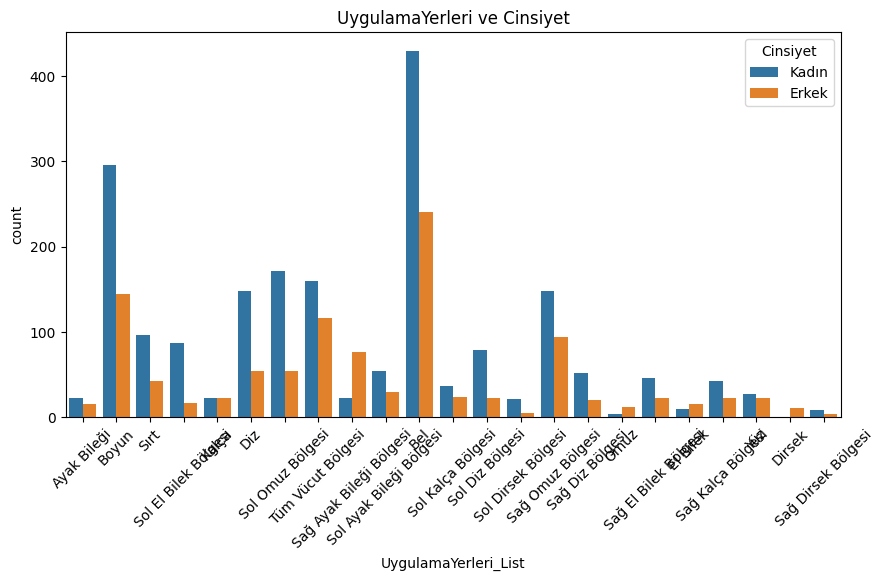

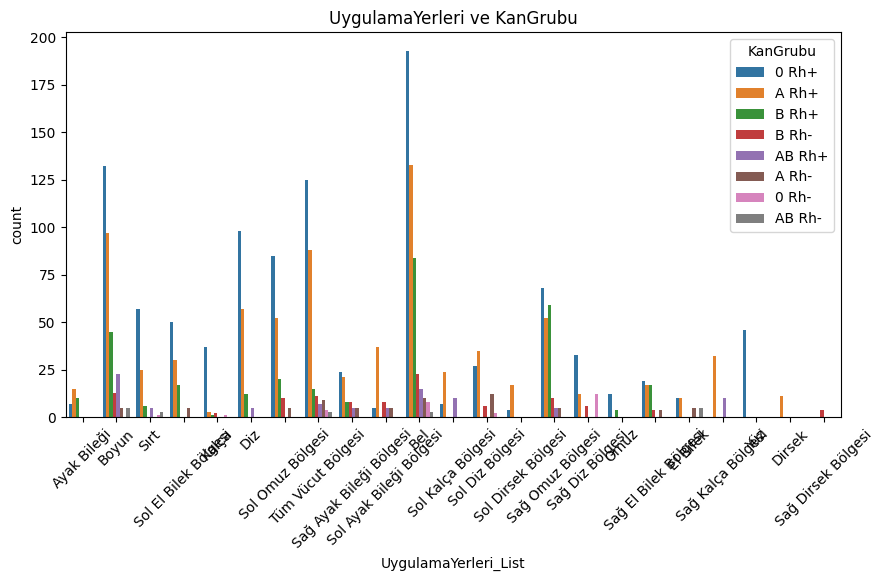

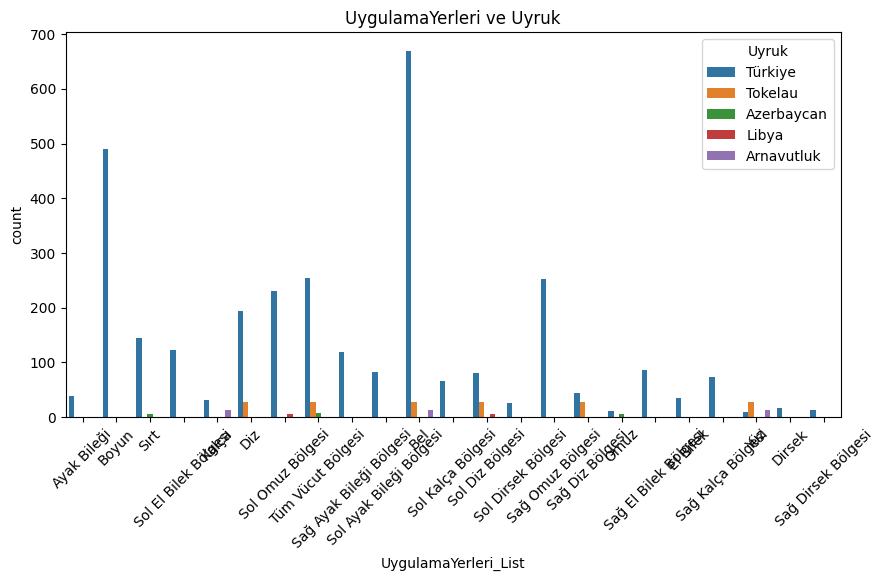

In [14]:
for c in multi_cols:
    for cat_col in ["Cinsiyet", "KanGrubu", "Uyruk"]:

        merge_df = pd.merge(long_dfs[c], df[["HastaNo", cat_col]], on="HastaNo")

        if c in ["Tanilar", "TedaviAdi"]:
            top10 = merge_df[c + "_List"].value_counts().head(10).index
            merge_df = merge_df[merge_df[c + "_List"].isin(top10)]
            
        plt.figure(figsize=(10, 5))
        sns.countplot(data=merge_df, x=c+"_List", hue=cat_col)
        plt.xticks(rotation=45)
        plt.title(f"{c} ve {cat_col}")
        plt.show()

In [ ]:
# MULTİ DEĞİŞKENLERİN BİRBİRLERİYLE ARALARINDAKİ İLİŞKİ

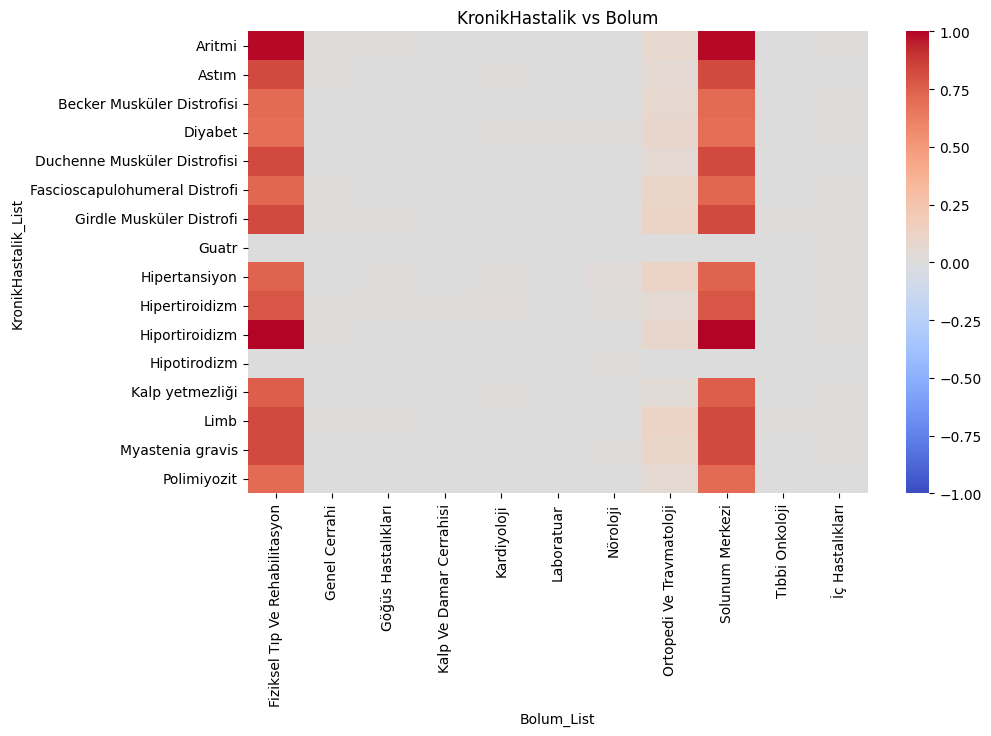

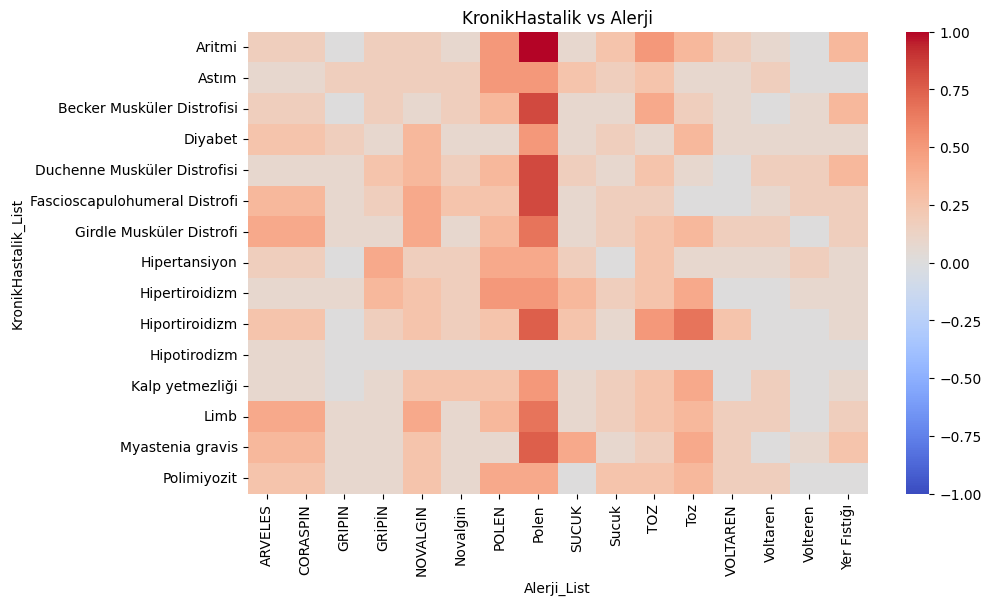

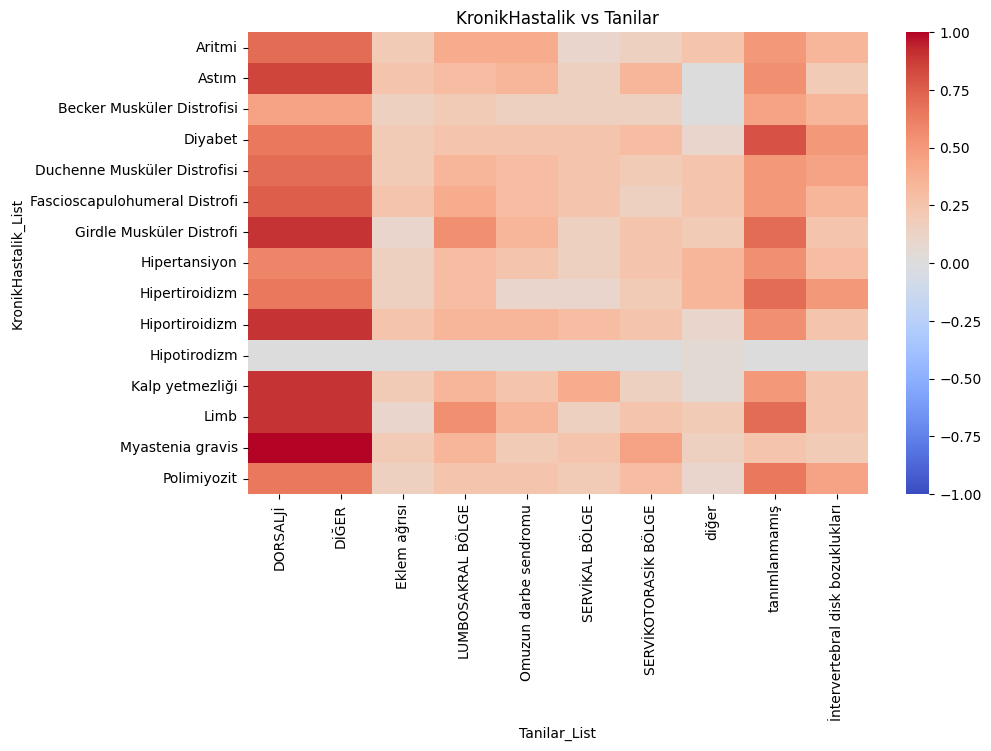

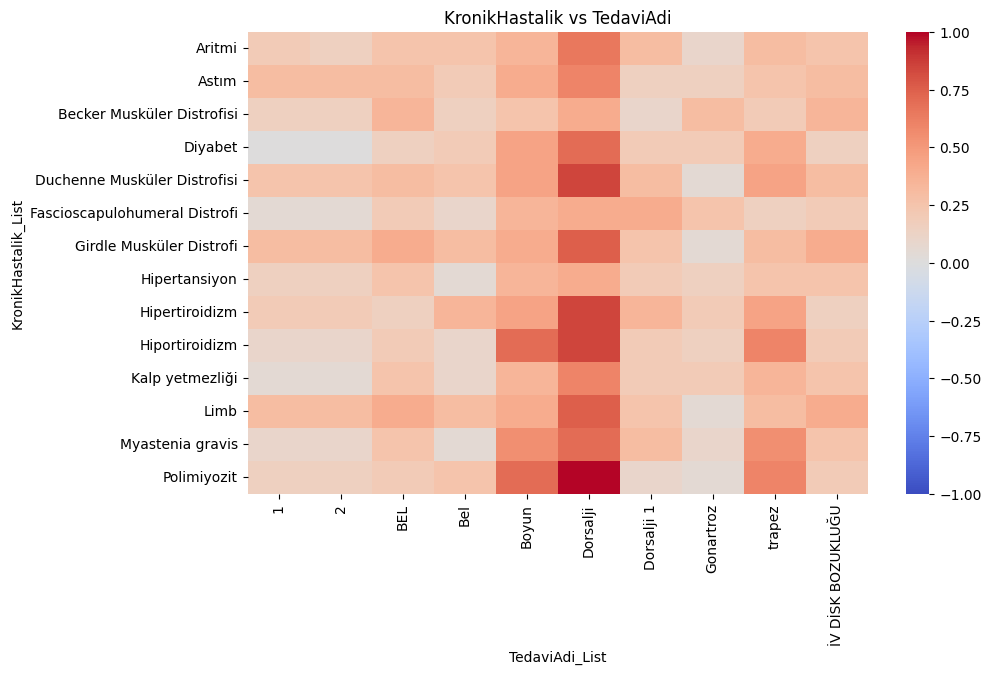

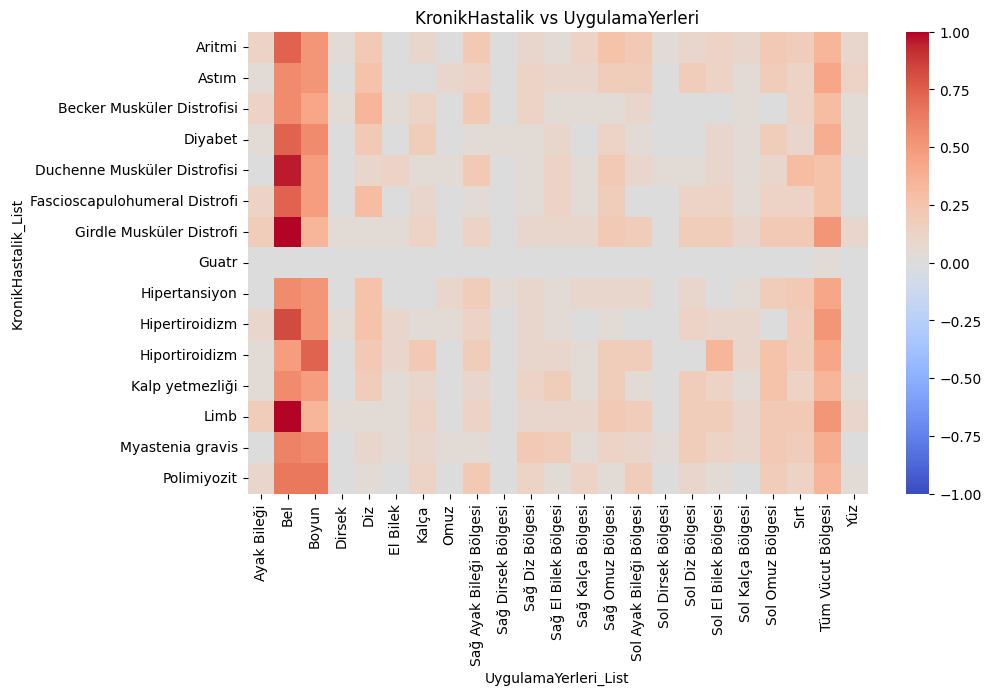

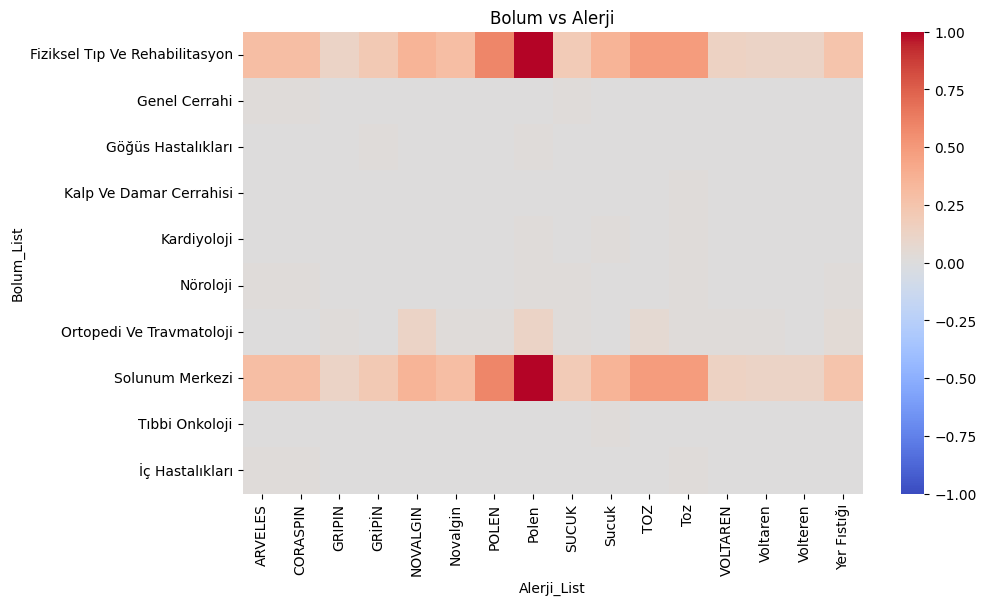

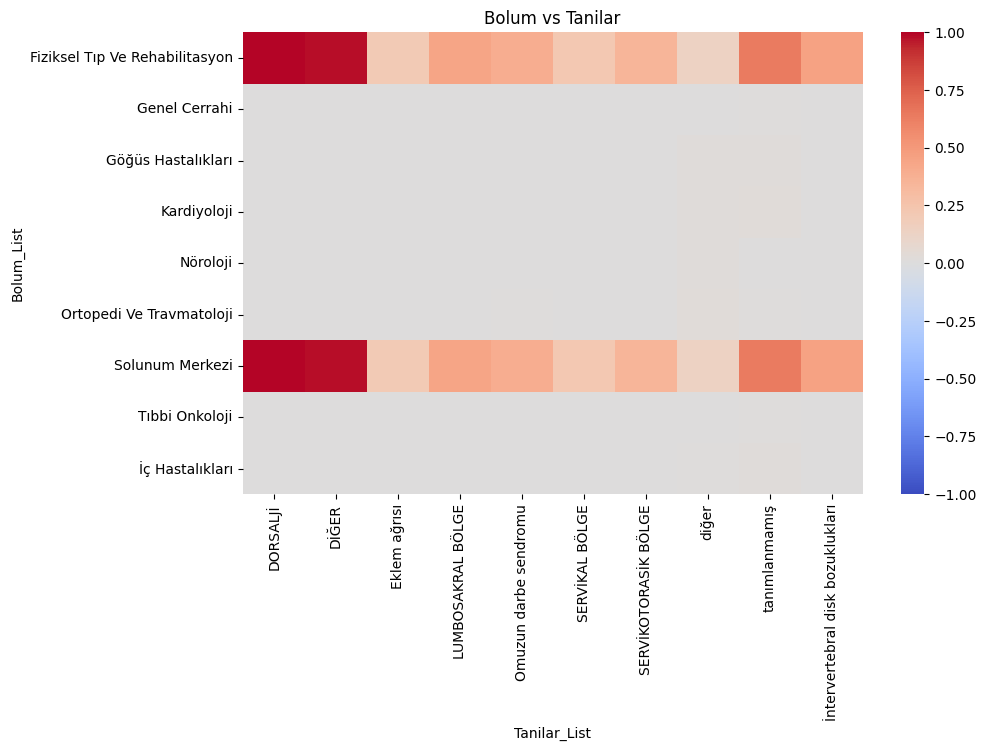

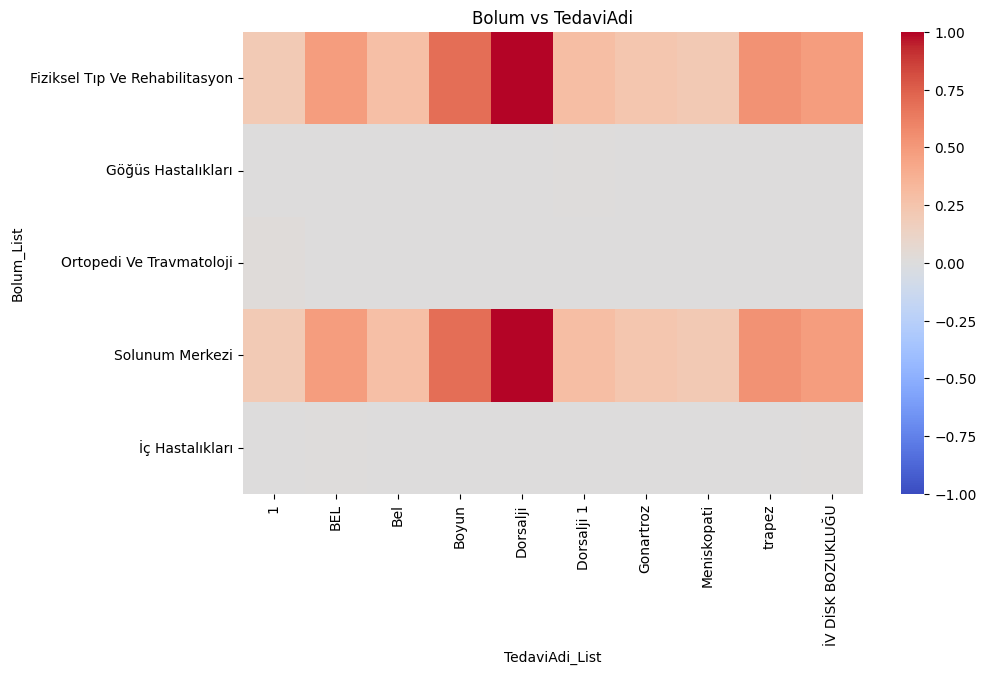

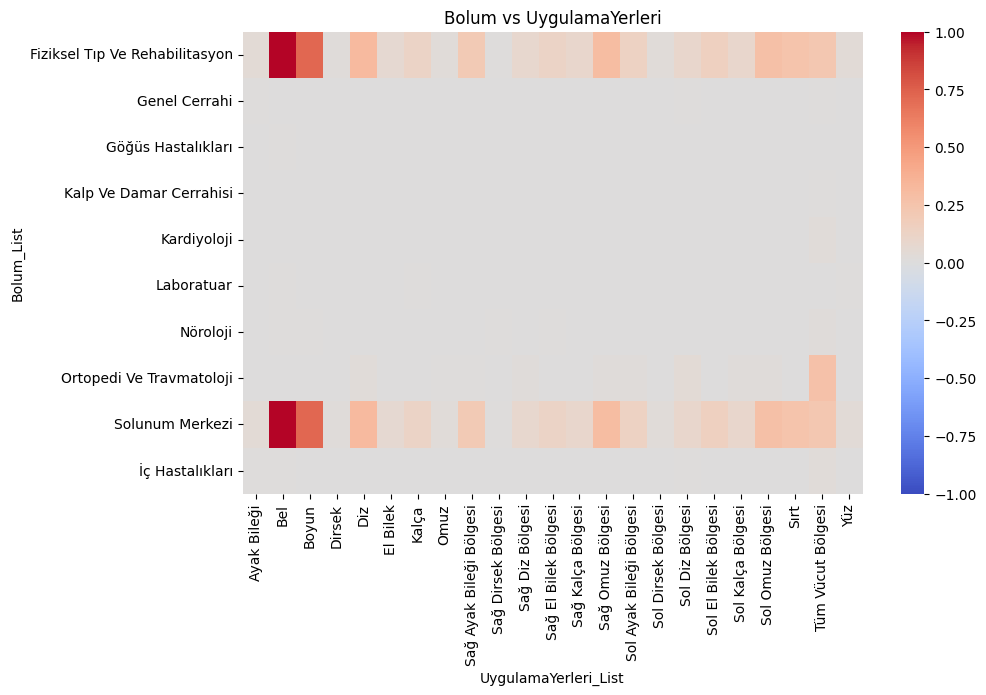

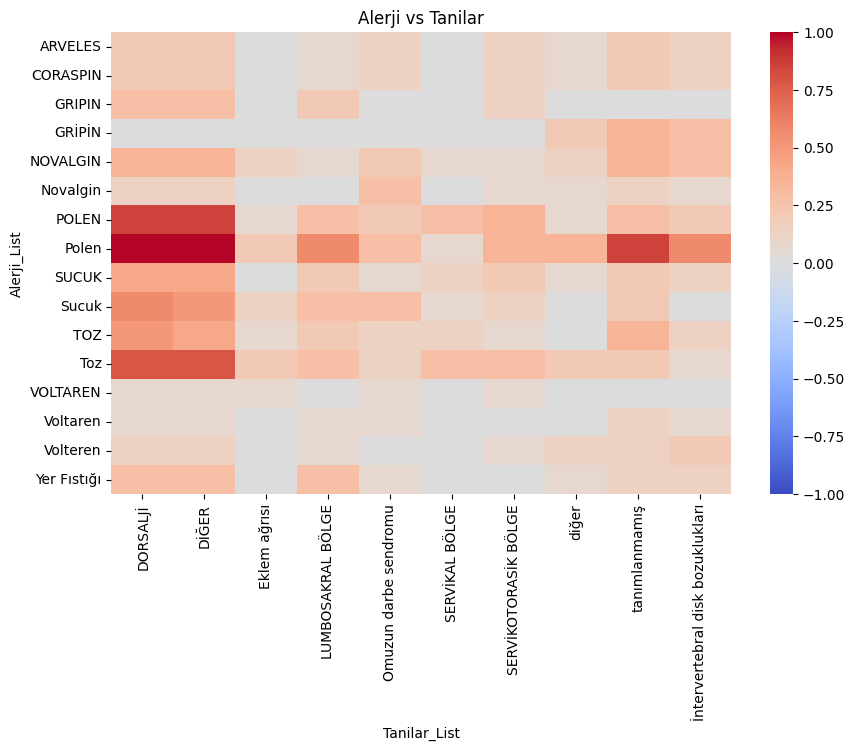

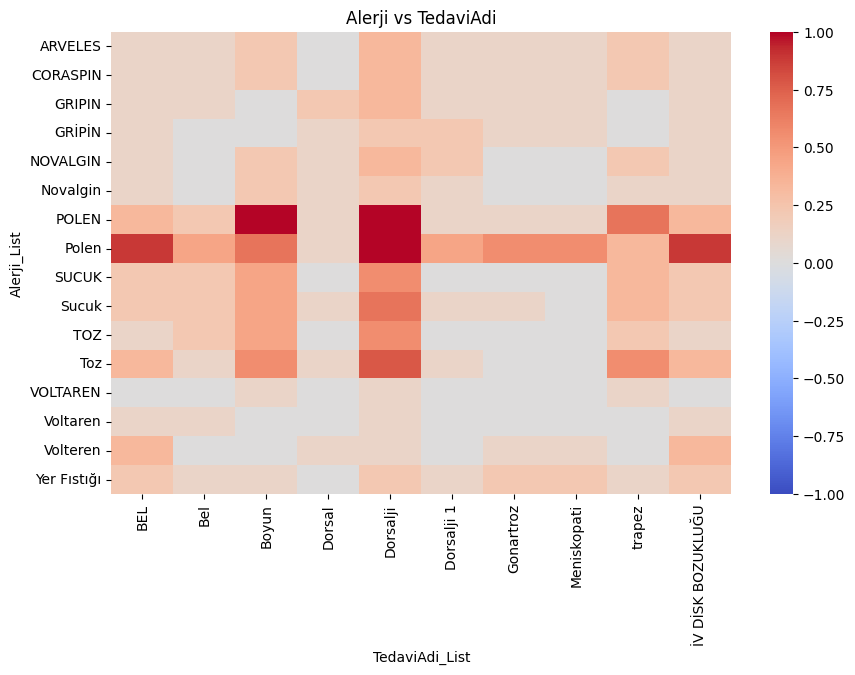

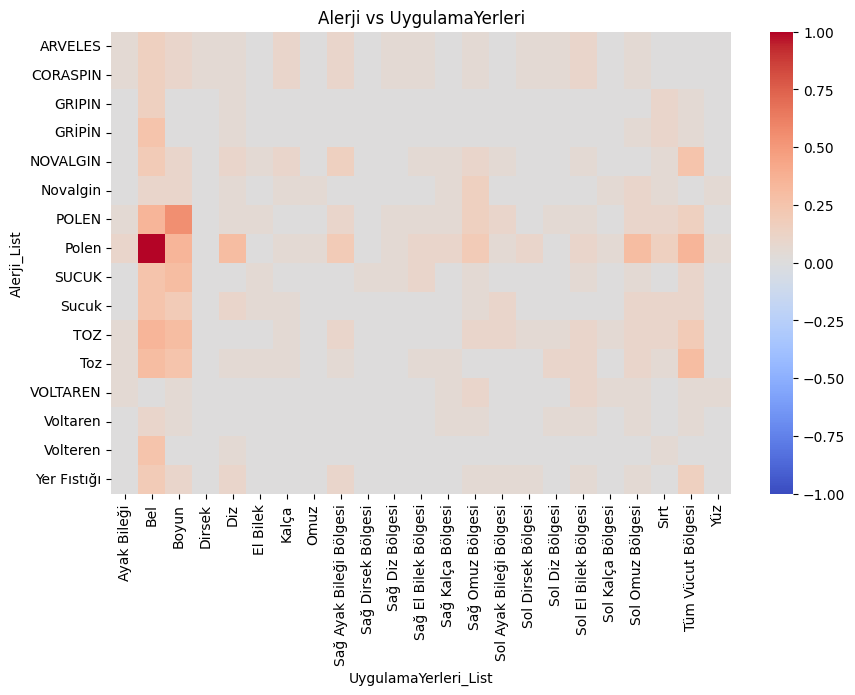

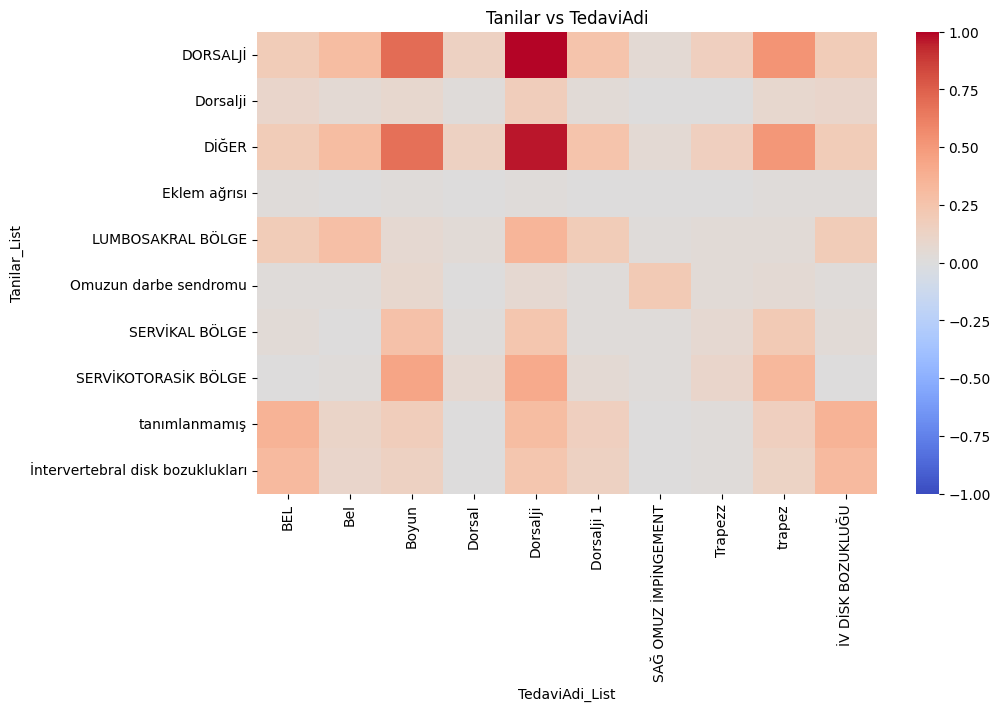

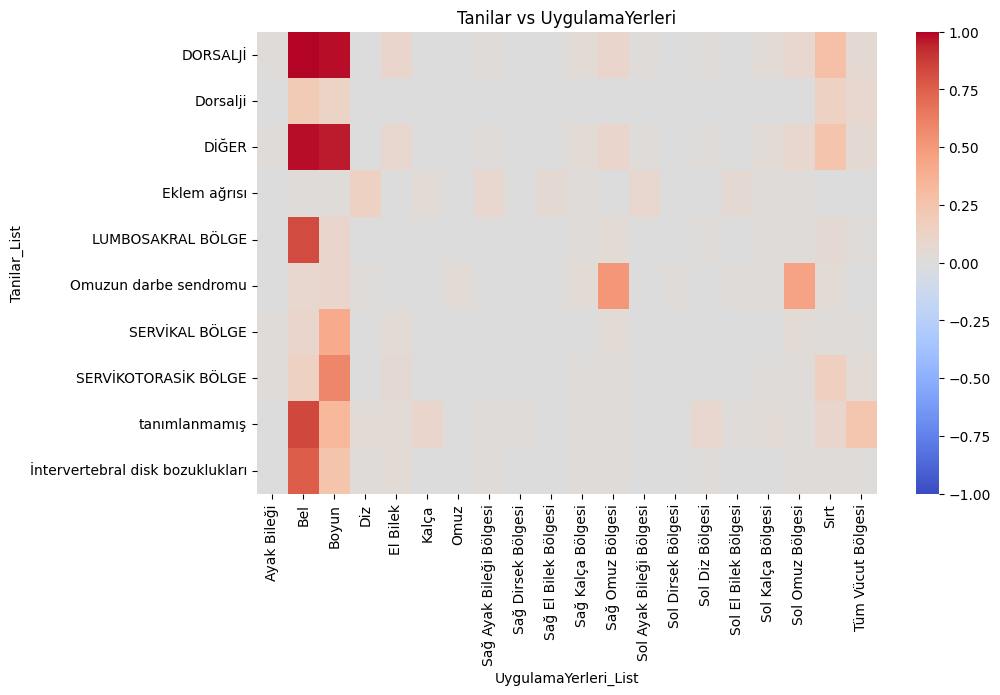

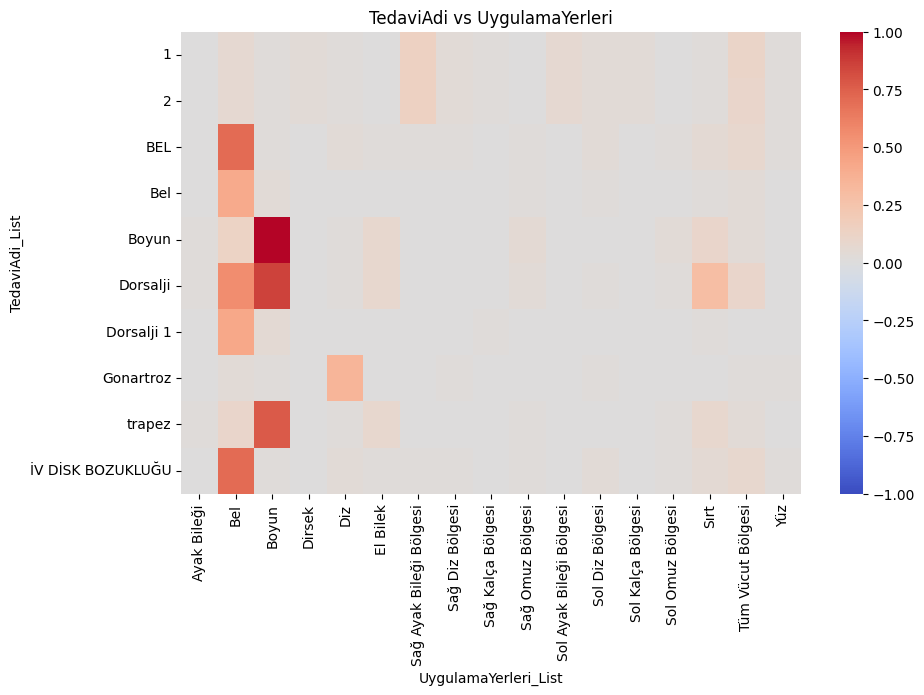

In [ ]:
from itertools import combinations

for c1, c2 in combinations(multi_cols, 2):
    merged = pd.merge(long_dfs[c1], long_dfs[c2], on="HastaNo")

    if c1 in ["Tanilar", "TedaviAdi"]:
        top10_c1 = merged[c1 + "_List"].value_counts().head(10).index
        merged = merged[merged[c1 + "_List"].isin(top10_c1)]
    if c2 in ["Tanilar", "TedaviAdi"]:
        top10_c2 = merged[c2 + "_List"].value_counts().head(10).index
        merged = merged[merged[c2 + "_List"].isin(top10_c2)]

    if merged.empty:  
        continue

    cross = pd.crosstab(merged[c1 + "_List"], merged[c2 + "_List"])

    cross_norm = cross / cross.values.max()

    plt.figure(figsize=(10, 6))
    sns.heatmap(cross_norm, cmap="coolwarm", vmin=-1, vmax=1)
    plt.title(f"{c1} vs {c2}")
    plt.show()

In [ ]:
# Hedef Değişken ile Sayısal Değişkenler Arasındaki İlişkiler

In [16]:
df["TedaviSuresi"] = df["TedaviSuresi"].str.replace("Seans", "").str.strip().astype(int)
df["UygulamaSuresi"] = df["UygulamaSuresi"].str.replace("Dakika", "").str.strip().astype(int)

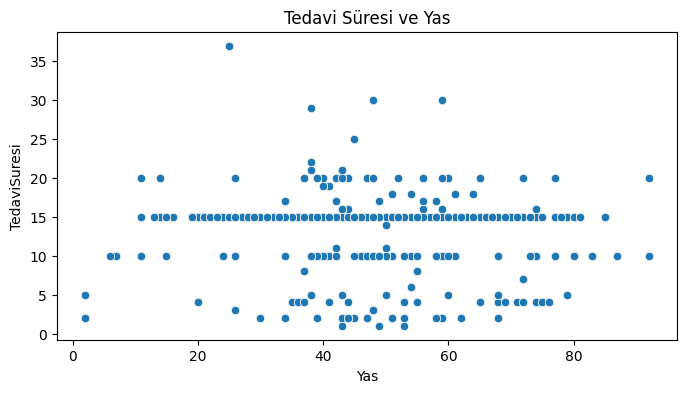

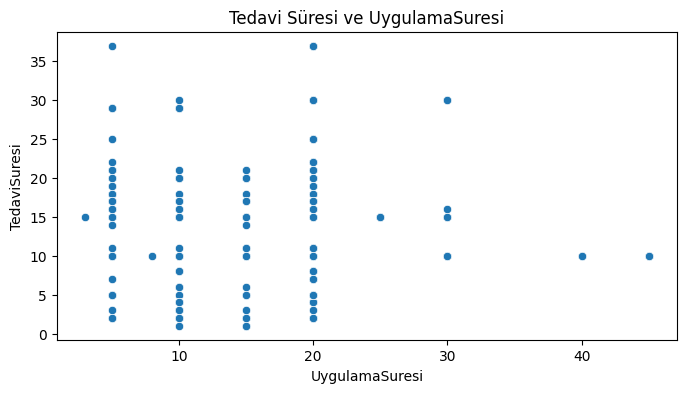

In [28]:
for num_col in ["Yas", "UygulamaSuresi"]:
    plt.figure(figsize=(8, 4))
    sns.scatterplot(data=df, x=num_col, y="TedaviSuresi")
    plt.title(f"Tedavi Süresi ve {num_col}")
    plt.show()

In [ ]:
# TEDAVİ SÜRESİ VE TEKİL KATEGORİK DEĞİŞKENLER ARASINDAKİ İLİŞKİLER

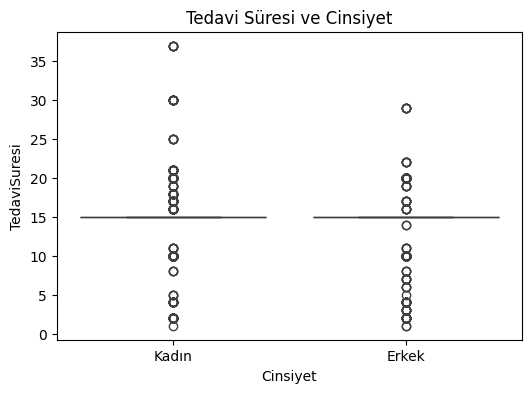

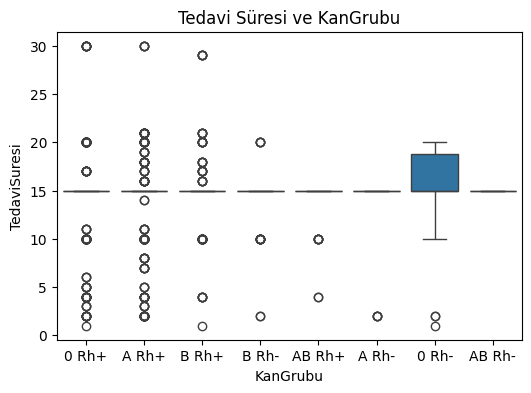

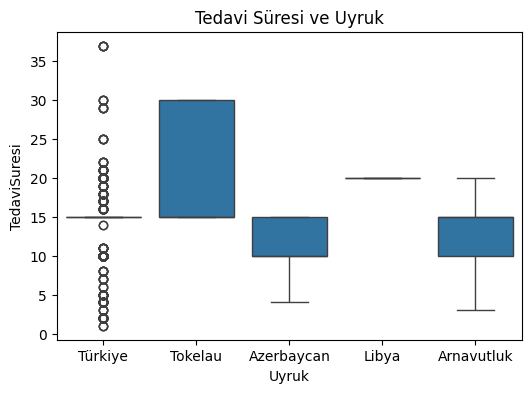

In [30]:
for cat_col in ["Cinsiyet", "KanGrubu", "Uyruk"]:

    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x=cat_col, y="TedaviSuresi")
    plt.title(f"Tedavi Süresi ve {cat_col}")
    plt.show()

In [ ]:
# TEDAVİ SÜRESİ VE MULTİ KATEGORİK DEĞİŞKENLER

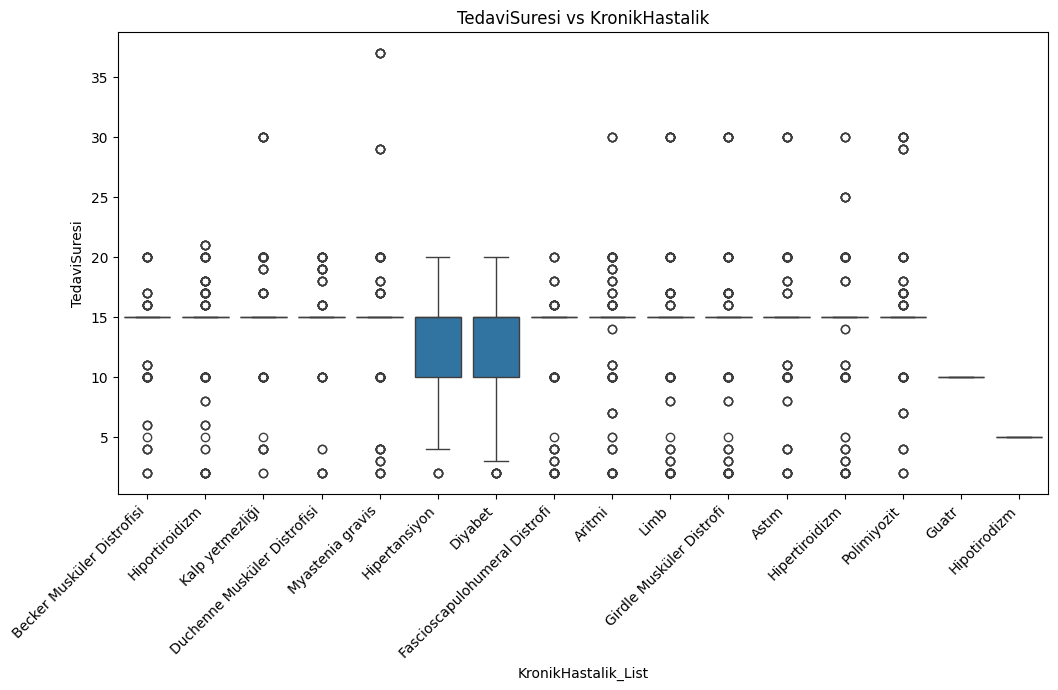

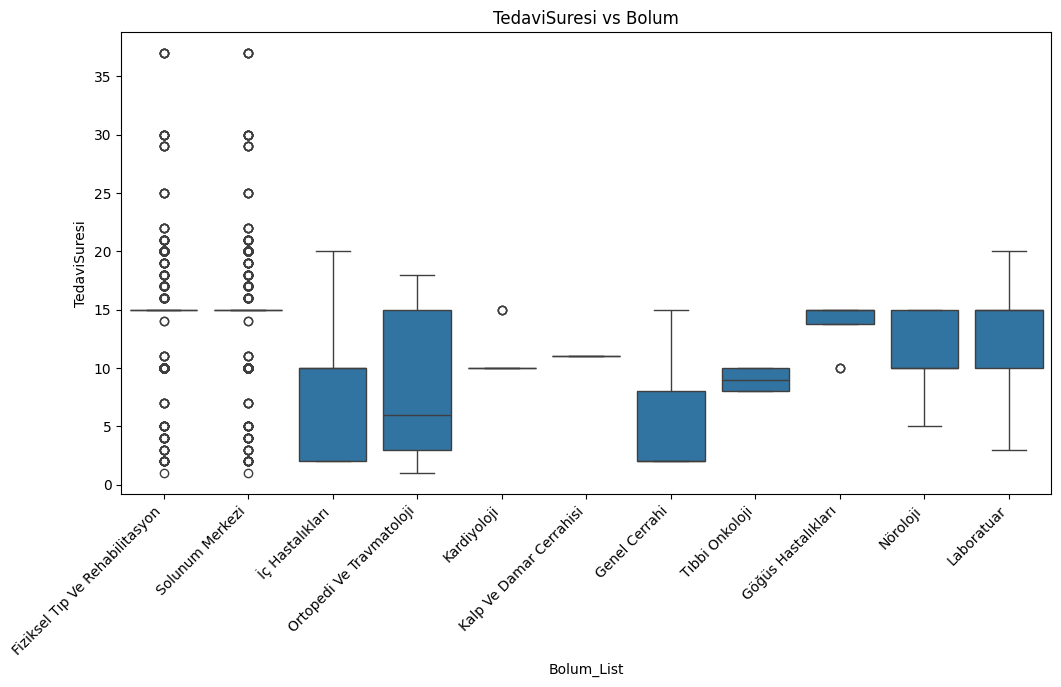

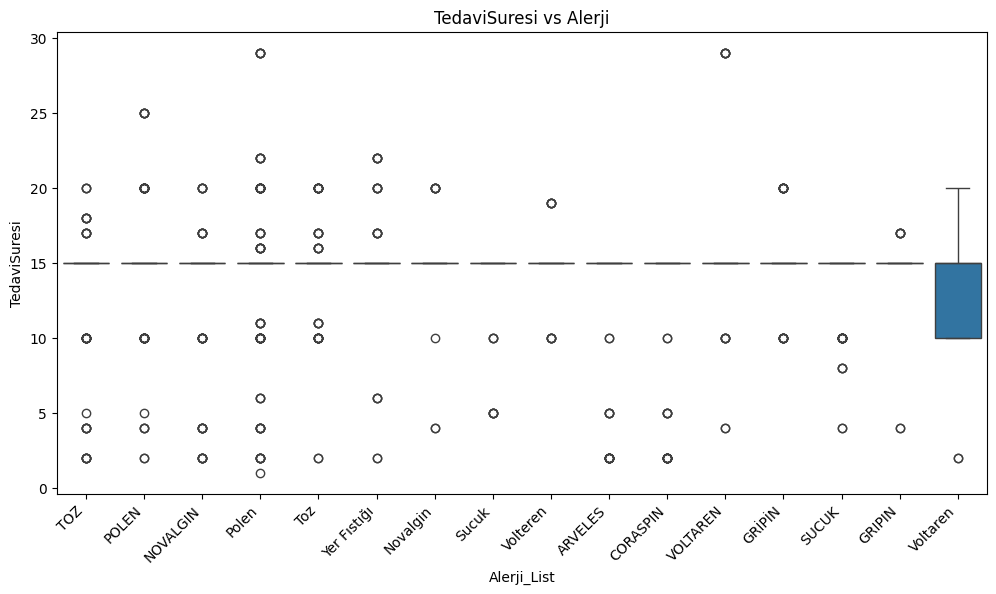

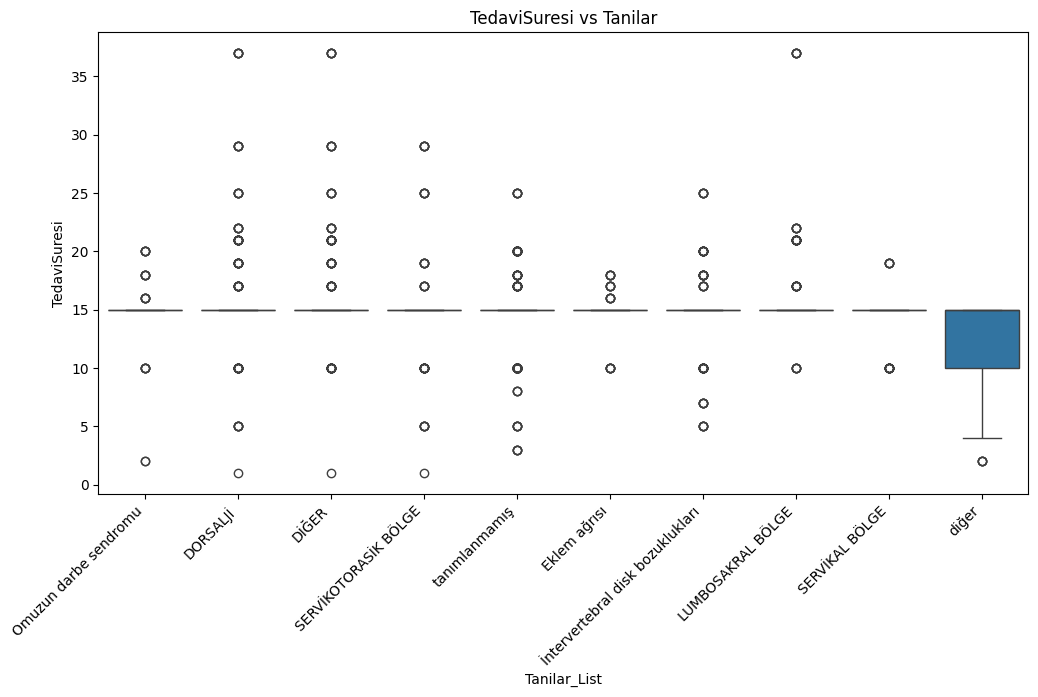

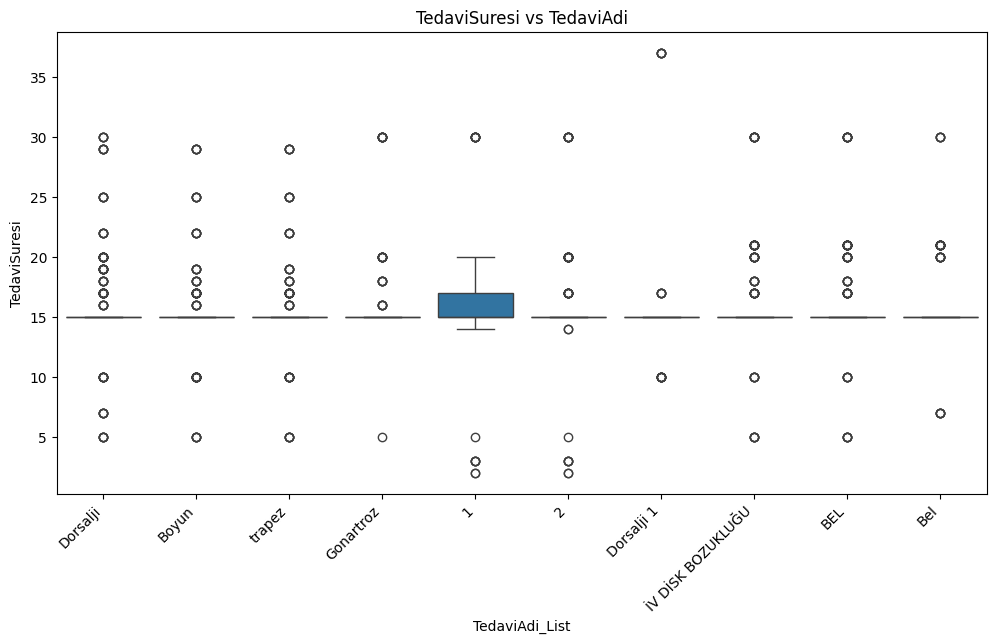

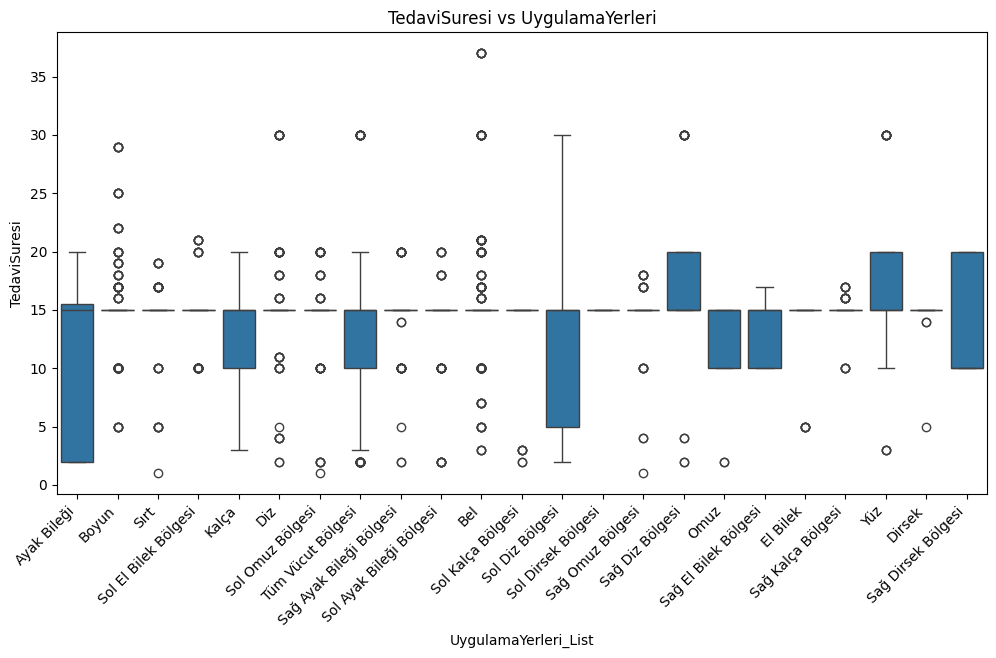

In [32]:
for c in multi_cols:
    merge_df = pd.merge(long_dfs[c], df[["HastaNo", "TedaviSuresi"]], on="HastaNo")

    if c in ["Tanilar", "TedaviAdi"]:
        top10 = merge_df[c + "_List"].value_counts().head(10).index
        merge_df = merge_df[merge_df[c + "_List"].isin(top10)]

    plt.figure(figsize=(12, 6))
    sns.boxplot(data=merge_df, x=c + "_List", y="TedaviSuresi")
    plt.xticks(rotation=45, ha="right")
    plt.title(f"TedaviSuresi vs {c}")
    plt.show()

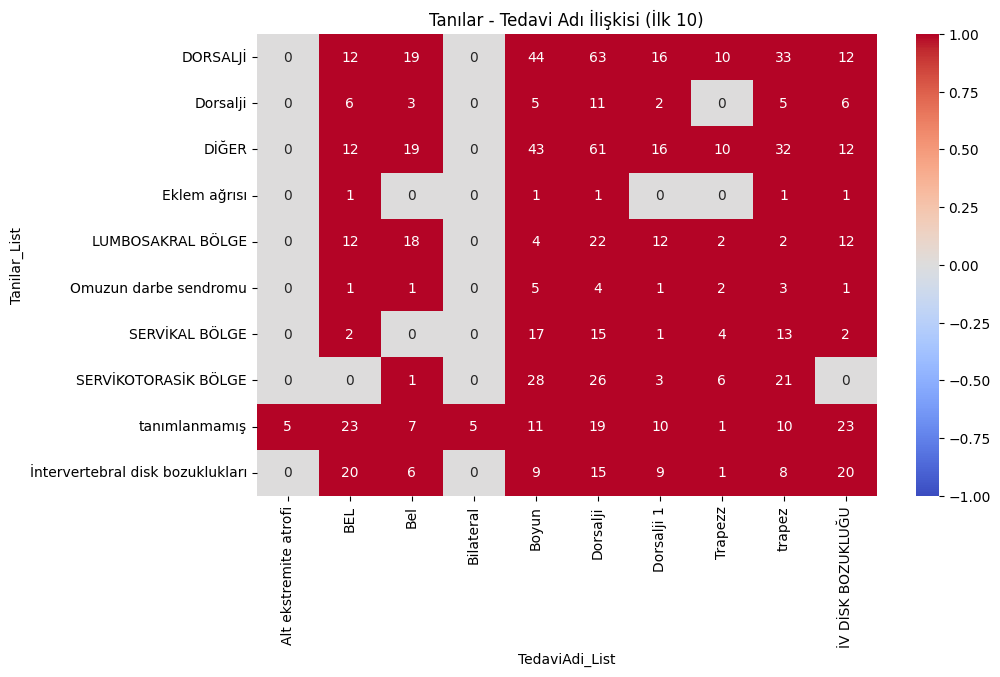

In [ ]:
tanilar = long_dfs["Tanilar"]
tedavi = long_dfs["TedaviAdi"]

tanilar_tedavi = pd.merge(tanilar, tedavi, on="HastaNo")

top10_tanilar = tanilar_tedavi["Tanilar_List"].value_counts().head(10).index
top10_tedavi = tanilar_tedavi["TedaviAdi_List"].value_counts().head(10).index

filtered = tanilar_tedavi[
    tanilar_tedavi["Tanilar_List"].isin(top10_tanilar) &
    tanilar_tedavi["TedaviAdi_List"].isin(top10_tedavi)
]

plt.figure(figsize=(10,6))
sns.heatmap(
    pd.crosstab(filtered["Tanilar_List"], filtered["TedaviAdi_List"]), 
    cmap="coolwarm", annot=True, fmt="d", vmin=-1, vmax=1
)
plt.title("Tanılar - Tedavi Adı İlişkisi (İlk 10)")
plt.show()

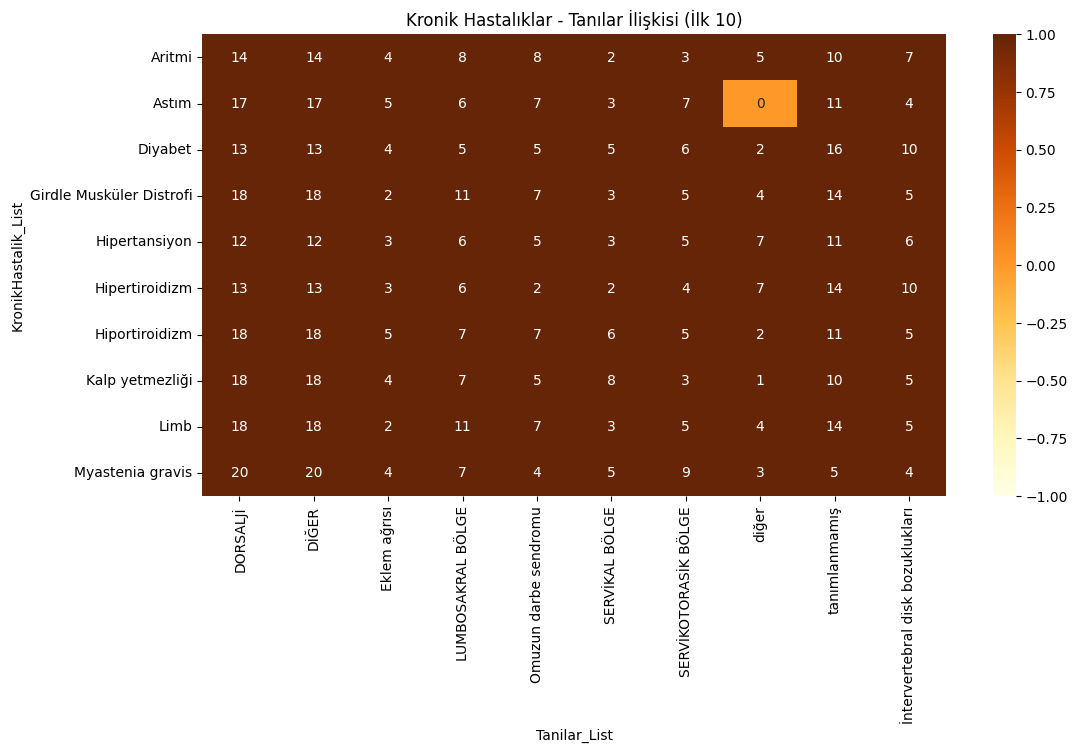

In [7]:
kronik = long_dfs["KronikHastalik"]
tanilar = long_dfs["Tanilar"]

kronik_tanilar = pd.merge(kronik, tanilar, on="HastaNo")

top10_kronik = kronik_tanilar["KronikHastalik_List"].value_counts().head(10).index
top10_tanilar = kronik_tanilar["Tanilar_List"].value_counts().head(10).index

filtered = kronik_tanilar[
    kronik_tanilar["KronikHastalik_List"].isin(top10_kronik) &
    kronik_tanilar["Tanilar_List"].isin(top10_tanilar)
]

plt.figure(figsize=(12,6))
sns.heatmap(
    pd.crosstab(filtered["KronikHastalik_List"], filtered["Tanilar_List"]),
    cmap="YlOrBr", annot=True, fmt="d", vmin=-1, vmax=1
)
plt.title("Kronik Hastalıklar - Tanılar İlişkisi (İlk 10)")
plt.show()

In [ ]:
# HASTANO BAZLI ANALİZLER

In [19]:
hasta_ozet = pd.DataFrame()

hasta_ozet["Tani_Sayisi"] = long_dfs["Tanilar"].groupby("HastaNo")["Tanilar_List"].nunique()
hasta_ozet["Tedavi_Sayisi"] = long_dfs["TedaviAdi"].groupby("HastaNo")["TedaviAdi_List"].nunique()
hasta_ozet["Kronik_Sayisi"] = long_dfs["KronikHastalik"].groupby("HastaNo")["KronikHastalik_List"].nunique()

hasta_ozet["Ortalama_Tedavi_Suresi"] = df.groupby("HastaNo")["TedaviSuresi"].mean()
hasta_ozet["Ortalama_Uygulama_Suresi"] = df.groupby("HastaNo")["UygulamaSuresi"].mean()

hasta_ozet = hasta_ozet.fillna(0).astype(int)

hasta_ozet.head(15) 

Tani_Sayisi  Tedavi_Sayisi  Kronik_Sayisi  Ortalama_Tedavi_Suresi  \
HastaNo                                                                      
145134             1              1              3                       5   
145135             4              4              4                      15   
145136             1              1              0                      10   
145137             4              4              4                      15   
145138             1              2              4                      18   
145139             2              2              3                      15   
145140             3              3              1                      15   
145141             3              2              0                      15   
145142            17              2              1                      20   
145143             1              4              4                      11   
145144             2              2              0                      20   
145145             1              1              1                      15   
145146             3              2              2                      17   
145147             4              1              2                      15   
145148             4              2              2                      10   

         Ortalama_Uygulama_Suresi  
HastaNo                            
145134                         20  
145135                         17  
145136                         23  
145137                         15  
145138                         15  
145139                         17  
145140                         17  
145141                         21  
145142                         18  
145143                         13  
145144                         17  
145145                         20  
145146                         17  
145147                         17  
145148                         23

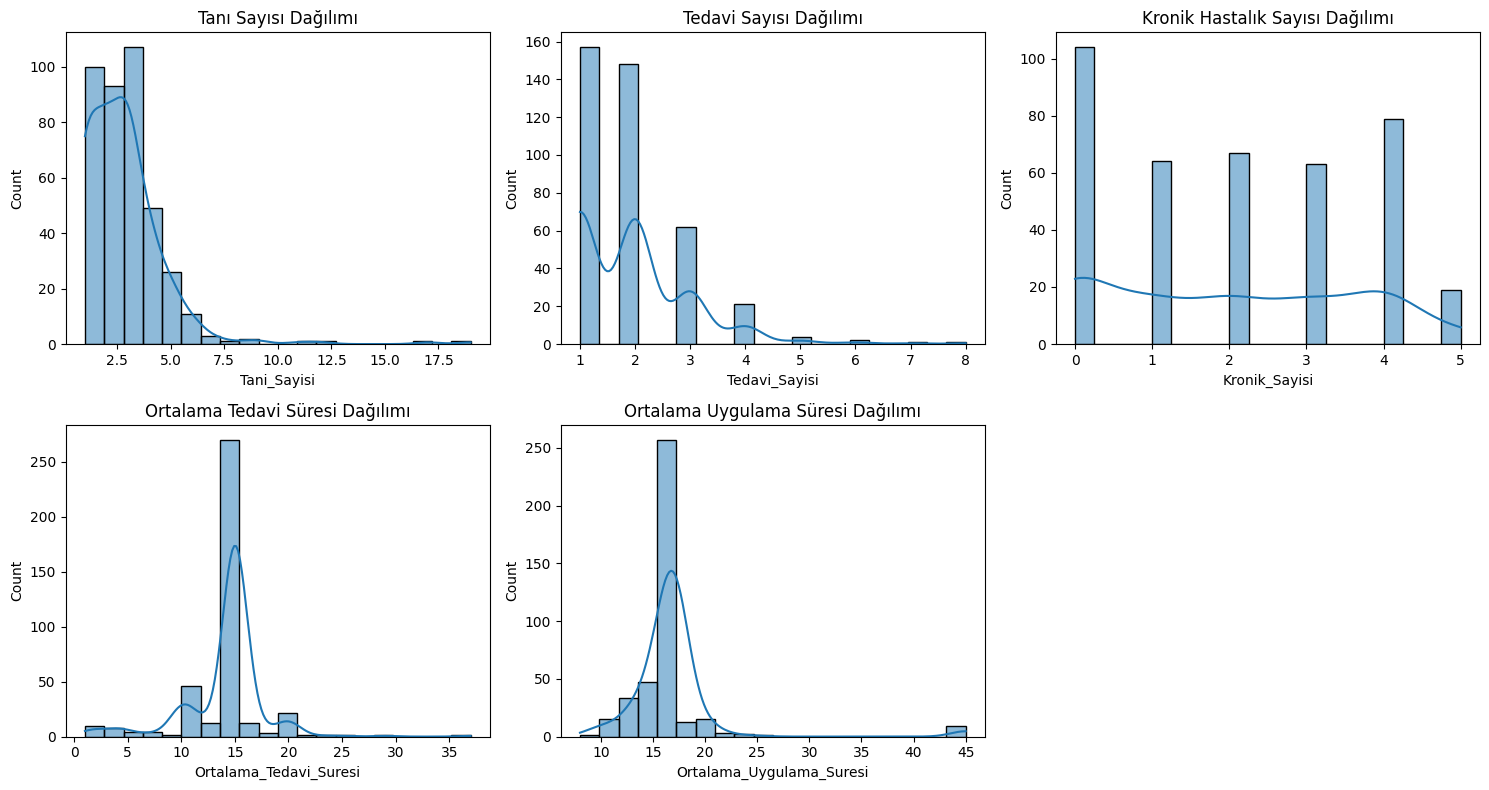

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

sns.histplot(hasta_ozet["Tani_Sayisi"], bins=20, ax=axes[0,0], kde=True)
axes[0,0].set_title("Tanı Sayısı Dağılımı")

sns.histplot(hasta_ozet["Tedavi_Sayisi"], bins=20, ax=axes[0,1], kde=True)
axes[0,1].set_title("Tedavi Sayısı Dağılımı")

sns.histplot(hasta_ozet["Kronik_Sayisi"], bins=20, ax=axes[0,2], kde=True)
axes[0,2].set_title("Kronik Hastalık Sayısı Dağılımı")

sns.histplot(hasta_ozet["Ortalama_Tedavi_Suresi"], bins=20, ax=axes[1,0], kde=True)
axes[1,0].set_title("Ortalama Tedavi Süresi Dağılımı")

sns.histplot(hasta_ozet["Ortalama_Uygulama_Suresi"], bins=20, ax=axes[1,1], kde=True)
axes[1,1].set_title("Ortalama Uygulama Süresi Dağılımı")

axes[1,2].axis("off")

plt.tight_layout()
plt.show()

In [24]:
df[df["HastaNo"] == 145142][["Yas","Cinsiyet","KanGrubu", "Uyruk", "KronikHastalik", "Alerji", "Tanilar", "TedaviAdi", "TedaviSuresi", "UygulamaYerleri"]]

Yas Cinsiyet KanGrubu    Uyruk   KronikHastalik Alerji  \
46   92    Erkek    B Rh+  Türkiye  Kalp yetmezliği    Toz   
47   92    Erkek    B Rh+  Türkiye  Kalp yetmezliği    Toz   
48   92    Erkek    B Rh+  Türkiye  Kalp yetmezliği    Toz   
49   92    Erkek    B Rh+  Türkiye  Kalp yetmezliği    Toz   
50   92    Erkek    B Rh+  Türkiye  Kalp yetmezliği    Toz   
51   92    Erkek    B Rh+  Türkiye  Kalp yetmezliği    Toz   
52   92    Erkek    B Rh+  Türkiye  Kalp yetmezliği    Toz   

                                              Tanilar  \
46  Esansiyel (primer) hipertansiyon,Diyabetes mel...   
47  Esansiyel (primer) hipertansiyon,Diyabetes mel...   
48  Esansiyel (primer) hipertansiyon,Diyabetes mel...   
49  Esansiyel (primer) hipertansiyon ,Diyabetes me...   
50  Esansiyel (primer) hipertansiyon,Diyabetes mel...   
51  Esansiyel (primer) hipertansiyon,Diyabetes mel...   
52  Esansiyel (primer) hipertansiyon,Diyabetes mel...   

                          TedaviAdi  TedaviSuresi    UygulamaYerleri  
46  Alt ekstremite atrofi-Bilateral            20                NaN  
47  Alt ekstremite atrofi-Bilateral            20                NaN  
48  Alt ekstremite atrofi-Bilateral            20                NaN  
49  Alt ekstremite atrofi-Bilateral            20                NaN  
50  Alt ekstremite atrofi-Bilateral            20                NaN  
51  Alt ekstremite atrofi-Bilateral            20                NaN  
52  Alt ekstremite atrofi-Bilateral            20  Tüm Vücut Bölgesi

In [26]:
df[df["HastaNo"] == 145184][["Yas","Cinsiyet","KanGrubu", "Uyruk", "KronikHastalik", "Alerji", "Tanilar", "TedaviAdi", "TedaviSuresi", "UygulamaYerleri"]]

Yas Cinsiyet KanGrubu    Uyruk              KronikHastalik Alerji  \
281   51    Kadın    A Rh+  Türkiye  Becker Musküler Distrofisi    NaN   
282   51    Kadın    A Rh+  Türkiye  Becker Musküler Distrofisi    NaN   
283   51    Kadın    A Rh+  Türkiye  Becker Musküler Distrofisi    NaN   
284   51    Kadın    A Rh+  Türkiye  Becker Musküler Distrofisi    NaN   
285   51    Kadın    A Rh+  Türkiye  Becker Musküler Distrofisi    NaN   

                        Tanilar              TedaviAdi  TedaviSuresi  \
281   Menisküs yırtığı, şimdiki  Gonartroz-Meniskopati            15   
282   Menisküs yırtığı, şimdiki  Gonartroz-Meniskopati            15   
283   Menisküs yırtığı, şimdiki  Gonartroz-Meniskopati            15   
284  Menisküs yırtı`ğı, şimdiki  Gonartroz-Meniskopati            15   
285   Menisküs yırtığı, şimdiki  Gonartroz-Meniskopati            15   

    UygulamaYerleri  
281             Diz  
282             Diz  
283             Diz  
284             Diz  
285             Diz

In [28]:
df[df["HastaNo"] == 145196][["Yas","Cinsiyet","KanGrubu", "Uyruk", "KronikHastalik", "Alerji", "Tanilar", "TedaviAdi", "TedaviSuresi", "UygulamaYerleri"]]

Yas Cinsiyet KanGrubu    Uyruk  \
338   39    Kadın    B Rh+  Türkiye   
339   39    Kadın    B Rh+  Türkiye   
340   39    Kadın    B Rh+  Türkiye   
341   39    Kadın    B Rh+  Türkiye   

                                        KronikHastalik    Alerji  \
338  Hipertiroidizm, Duchenne Musküler Distrofisi, ...  Novalgin   
339  Hipertiroidizm, Duchenne Musküler Distrofisi, ...  Novalgin   
340  Hipertiroidizm, Duchenne Musküler Distrofisi, ...  Novalgin   
341  Hipertiroidizm, Duchenne Musküler Distrofisi, ...  Novalgin   

                                   Tanilar        TedaviAdi  TedaviSuresi  \
338  Kondrokostal kavşak sendromu [Tietze]  Myodascial ağrı            15   
339  Kondrokostal kavşak sendromu [Tietze]  Myodascial ağrı            15   
340  Kondrokostal kavşak sendromu [Tietze]  Myodascial ağrı            15   
341  Kondrokostal kavşak sendromu [Tietze]  Myodascial ağrı            15   

    UygulamaYerleri  
338            Omuz  
339            Omuz  
340            Omuz  
341            Omuz

In [30]:
df[df["HastaNo"] == 145230][["Yas","Cinsiyet","KanGrubu", "Uyruk", "KronikHastalik", "Alerji", "Tanilar", "TedaviAdi", "TedaviSuresi", "UygulamaYerleri"]]

Yas Cinsiyet KanGrubu    Uyruk               KronikHastalik Alerji  \
515   83    Kadın    0 Rh+  Türkiye  Hipertansiyon,Diyabet,Guatr    NaN   
516   83    Kadın    0 Rh+  Türkiye  Hipertansiyon,Diyabet,Guatr    NaN   
517   83    Kadın    0 Rh+  Türkiye  Hipertansiyon,Diyabet,Guatr    NaN   

                                               Tanilar  \
515  Viral enfeksiyonlar, tanımlanmamış bölgelerin,...   
516  Viral enfeksiyonlar, tanımlanmamış bölgelerin,...   
517  Viral enfeksiyonlar, tanımlanmamış bölgelerin,...   

                                    TedaviAdi  TedaviSuresi    UygulamaYerleri  
515                       Yaygın kuvvetsizlik            10                NaN  
516                       Yaygın kuvvetsizlik            10                NaN  
517  Yaygın kuvvetsizlik-Yürüme egzersizleri             10  Tüm Vücut Bölgesi

In [34]:
df[df["HastaNo"] == 145261][["Yas","Cinsiyet","KanGrubu", "Uyruk", "KronikHastalik", "Alerji", "Tanilar", "TedaviAdi", "TedaviSuresi", "UygulamaYerleri"]]

Yas Cinsiyet KanGrubu    Uyruk KronikHastalik   Alerji  \
698   49    Kadın   AB Rh+  Türkiye            NaN  Toz,TOZ   
699   49    Kadın   AB Rh+  Türkiye            NaN  Toz,TOZ   
700   49    Kadın   AB Rh+  Türkiye            NaN  Toz,TOZ   
701   49    Kadın   AB Rh+  Türkiye            NaN  Toz,TOZ   
702   49    Kadın   AB Rh+  Türkiye            NaN  Toz,TOZ   

                                 Tanilar     TedaviAdi  TedaviSuresi  \
698  DORSALJİ,, DİĞER, LUMBOSAKRAL BÖLGE  Dorsalji-Bel            15   
699   DORSALJİ, DİĞER, LUMBOSAKRAL BÖLGE  Dorsalji-Bel            15   
700   DORSALJİ, DİĞER, LUMBOSAKRAL BÖLGE  Dorsalji-Bel            15   
701   DORSALJİ, DİĞER, LUMBOSAKRAL BÖLGE  Dorsalji-Bel            15   
702   DORSALJİ, DİĞER, LUMBOSAKRAL BÖLGE  Dorsalji-Bel            15   

    UygulamaYerleri  
698             Bel  
699             Bel  
700             Bel  
701             Bel  
702             Bel

In [40]:
df[df["HastaNo"] == 145275][["Yas","Cinsiyet","KanGrubu", "Uyruk", "KronikHastalik", "Alerji", "Tanilar", "TedaviAdi", "TedaviSuresi", "UygulamaYerleri"]]

Yas Cinsiyet KanGrubu    Uyruk KronikHastalik Alerji Tanilar  \
792   53    Erkek    0 Rh+  Türkiye        Diyabet    NaN     NaN   
793   53    Erkek    0 Rh+  Türkiye        Diyabet    NaN     NaN   

                              TedaviAdi  TedaviSuresi    UygulamaYerleri  
792  Eklem implant-Erken rehabilitasyon             2  Tüm Vücut Bölgesi  
793  Eklem implant-Erken rehabilitasyon             2                NaN

In [44]:
df[df["HastaNo"] == 145309][["Yas","Cinsiyet","KanGrubu", "Uyruk", "KronikHastalik", "Alerji", "Tanilar", "TedaviAdi", "TedaviSuresi", "UygulamaYerleri"]]

Yas Cinsiyet KanGrubu    Uyruk          KronikHastalik Alerji  \
981   50    Erkek    A Rh+  Türkiye  Hipertiroidizm, Aritmi    NaN   
982   50    Erkek    A Rh+  Türkiye  Hipertiroidizm, Aritmi    NaN   
983   50    Erkek    A Rh+  Türkiye  Hipertiroidizm, Aritmi    NaN   
984   50    Erkek    A Rh+  Türkiye  Hipertiroidizm, Aritmi    NaN   
985   50    Erkek    A Rh+  Türkiye  Hipertiroidizm, Aritmi    NaN   
986   50    Erkek    A Rh+  Türkiye  Hipertiroidizm, Aritmi    NaN   
987   50    Erkek    A Rh+  Türkiye  Hipertiroidizm, Aritmi    NaN   
988   50    Erkek    A Rh+  Türkiye  Hipertiroidizm, Aritmi    NaN   
989   50    Erkek    A Rh+  Türkiye  Hipertiroidizm, Aritmi    NaN   
990   50    Erkek    A Rh+  Türkiye  Hipertiroidizm, Aritmi    NaN   
991   50    Erkek    A Rh+  Türkiye  Hipertiroidizm, Aritmi    NaN   

                                     Tanilar      TedaviAdi  TedaviSuresi  \
981   Medial epikondilit,Lateral epikondilit  Epikondilit-1            14   
982   Medial epikondilit,Lateral epikondilit  Epikondilit-1            14   
983  Medial epikondilit,​Lateral epikondilit  Epikondilit-2            15   
984   Medial epikondilit,Lateral epikondilit  Epikondilit-2            15   
985   Medial epikondilit,Lateral epikondilit  Epikondilit-2            15   
986   Medial epikondilit,Lateral epikondilit  Epikondilit-2            15   
987   Medial epikondilit,Lateral epikondilit    Epikondilit            15   
988   Medial epikondilit,Lateral epikondilit    Epikondilit            15   
989   Medial epikondilit,Lateral epikondilit    Epikondilit            15   
990   Medial epikondilit,Lateral epikondilit    Epikondilit            15   
991   Medial epikondilit,Lateral epikondilit    Epikondilit             5   

             UygulamaYerleri  
981  Sağ Ayak Bileği Bölgesi  
982                   Dirsek  
983                   Dirsek  
984                   Dirsek  
985                   Dirsek  
986                   Dirsek  
987                   Dirsek  
988                   Dirsek  
989                   Dirsek  
990                   Dirsek  
991                   Dirsek

In [45]:
df[df["HastaNo"] == 145311][["Yas","Cinsiyet","KanGrubu", "Uyruk", "KronikHastalik", "Alerji", "Tanilar", "TedaviAdi", "TedaviSuresi", "UygulamaYerleri"]]

Yas Cinsiyet KanGrubu    Uyruk   KronikHastalik             Alerji  \
997    48      NaN    B Rh+  Türkiye  Kalp yetmezliği  Polen,Yer Fıstığı   
998    48      NaN    B Rh+  Türkiye  Kalp yetmezliği  Polen,Yer Fıstığı   
999    48    Kadın    B Rh+  Türkiye  Kalp yetmezliği  Polen,Yer Fıstığı   
1000   48    Kadın    B Rh+  Türkiye  Kalp yetmezliği  Polen,Yer Fıstığı   
1001   48    Kadın    B Rh+  Türkiye  Kalp yetmezliği  Polen,Yer Fıstığı   

                                                Tanilar  \
997   Lateral epikondilit,Medial menisküsün posterio...   
998   Lateral epikondilit,Medial menisküsün posterio...   
999   Lateral epikondilit,Medial menisküsün posterio...   
1000  Lateral epikondilit,Medial menisküsün posterio...   
1001  Lateral epikondilit,Medial menisküsün posterio...   

                  TedaviAdi  TedaviSuresi UygulamaYerleri  
997   Gonartroz-Meniskopati            15             Diz  
998   Gonartroz-Meniskopati            15             Diz  
999   Gonartroz-Meniskopati            15             Diz  
1000  Gonartroz-Meniskopati            15             Diz  
1001  Gonartroz-Meniskopati            15             Diz

In [57]:
df[df["Bolum"].isnull()]

HastaNo  Yas Cinsiyet KanGrubu    Uyruk          KronikHastalik Bolum  \
131   145157   59    Kadın    A Rh+  Türkiye  Hipertiroidizm, Aritmi   NaN   
132   145157   59    Kadın    A Rh+  Türkiye  Hipertiroidizm, Aritmi   NaN   
133   145157   59    Kadın    A Rh+  Türkiye  Hipertiroidizm, Aritmi   NaN   
134   145157   59    Kadın    A Rh+  Türkiye  Hipertiroidizm, Aritmi   NaN   
135   145157   59    Kadın    A Rh+  Türkiye  Hipertiroidizm, Aritmi   NaN   
136   145157   59    Kadın    A Rh+  Türkiye  Hipertiroidizm, Aritmi   NaN   
137   145157   59    Kadın    A Rh+  Türkiye  Hipertiroidizm, Aritmi   NaN   
138   145157   59    Kadın    A Rh+  Türkiye  Hipertiroidizm, Aritmi   NaN   
139   145157   59    Kadın    A Rh+  Türkiye  Hipertiroidizm, Aritmi   NaN   
140   145157   59    Kadın    A Rh+  Türkiye  Hipertiroidizm, Aritmi   NaN   
141   145157   59    Kadın    A Rh+  Türkiye  Hipertiroidizm, Aritmi   NaN   

    Alerji                        Tanilar                   TedaviAdi  \
131    NaN  Baş ağrısı, diğer sendromları        Parapleji-Tetrapleji   
132    NaN  Baş ağrısı, diğer sendromları        Parapleji-Tetrapleji   
133    NaN  Baş ağrısı, diğer sendromları        Parapleji-Tetrapleji   
134    NaN  Baş ağrısı, diğer sendromları        Parapleji-Tetrapleji   
135    NaN  Baş ağrısı, diğer sendromları  Dorsalji-Bel+ Eklem ağrsıı   
136    NaN  Baş ağrısı, diğer sendromları  Dorsalji-Bel+ Eklem ağrsıı   
137    NaN  Baş ağrısı, diğer sendromları  Dorsalji-Bel+ Eklem ağrsıı   
138    NaN  Baş ağrısı, diğer sendromları  Dorsalji-Bel+ Eklem ağrsıı   
139    NaN  Baş ağrısı, diğer sendromları  Dorsalji-Bel+ Eklem ağrsıı   
140    NaN  Baş ağrısı, diğer sendromları  Dorsalji-Bel+ Eklem ağrsıı   
141    NaN  Baş ağrısı, diğer sendromları  Dorsalji-Bel+ Eklem ağrsıı   

     TedaviSuresi    UygulamaYerleri  UygulamaSuresi  
131            30                NaN              20  
132            30                NaN              30  
133            30  Tüm Vücut Bölgesi              20  
134            30                NaN              20  
135            20                Bel              20  
136            20                Bel              20  
137            20                Bel              20  
138            20                Bel              20  
139            20                Bel               5  
140            20                NaN               5  
141            20                NaN              20

In [13]:
df[df["Tanilar"].isnull()].iloc[50:75]

HastaNo  Yas Cinsiyet KanGrubu       Uyruk  \
748    145267   48    Kadın    0 Rh+     Tokelau   
749    145267   48    Kadın    0 Rh+     Tokelau   
750    145267   48    Kadın    0 Rh+     Tokelau   
751    145267   48    Kadın    0 Rh+     Tokelau   
752    145267   48    Kadın    0 Rh+     Tokelau   
792    145275   53    Erkek    0 Rh+     Türkiye   
793    145275   53    Erkek    0 Rh+     Türkiye   
1229   145350   68    Kadın    A Rh-     Türkiye   
1230   145350   68    Kadın    A Rh-     Türkiye   
1231   145350   68    Kadın    A Rh-     Türkiye   
1232   145350   68    Kadın    A Rh-     Türkiye   
1233   145350   68    Kadın    A Rh-     Türkiye   
1234   145350   68    Kadın    A Rh-     Türkiye   
1235   145350   68    Kadın    A Rh-     Türkiye   
1800   145456   40    Erkek      NaN     Türkiye   
1801   145456   40    Erkek      NaN     Türkiye   
1802   145456   40    Erkek      NaN     Türkiye   
1803   145456   40    Erkek      NaN     Türkiye   
1804   145456   40    Erkek      NaN     Türkiye   
1946   145481   26    Erkek    0 Rh+  Arnavutluk   
1947   145481   26    Erkek    0 Rh+  Arnavutluk   
1948   145481   26    Erkek    0 Rh+  Arnavutluk   
1949   145481   26    Erkek    0 Rh+  Arnavutluk   
1950   145481   26    Erkek    0 Rh+  Arnavutluk   
1951   145481   26    Erkek    0 Rh+  Arnavutluk   

                                         KronikHastalik  \
748   Limb-Girdle Musküler Distrofi, Kalp yetmezliği...   
749   Limb-Girdle Musküler Distrofi, Kalp yetmezliği...   
750   Limb-Girdle Musküler Distrofi, Kalp yetmezliği...   
751   Limb-Girdle Musküler Distrofi, Kalp yetmezliği...   
752   Limb-Girdle Musküler Distrofi, Kalp yetmezliği...   
792                                             Diyabet   
793                                             Diyabet   
1229                                                NaN   
1230                                                NaN   
1231                                                NaN   
1232                                                NaN   
1233                                                NaN   
1234                                                NaN   
1235                                                NaN   
1800                                                NaN   
1801                                                NaN   
1802                                                NaN   
1803                                                NaN   
1804                                                NaN   
1946                                            Diyabet   
1947                                            Diyabet   
1948                                            Diyabet   
1949                                            Diyabet   
1950                                            Diyabet   
1951                                            Diyabet   

                                               Bolum  Alerji Tanilar  \
748   Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi     NaN     NaN   
749   Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi     NaN     NaN   
750   Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi     NaN     NaN   
751   Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi     NaN     NaN   
752   Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi     NaN     NaN   
792                         Ortopedi Ve Travmatoloji     NaN     NaN   
793                         Ortopedi Ve Travmatoloji     NaN     NaN   
1229                        Ortopedi Ve Travmatoloji     Toz     NaN   
1230                        Ortopedi Ve Travmatoloji     Toz     NaN   
1231                        Ortopedi Ve Travmatoloji     Toz     NaN   
1232                        Ortopedi Ve Travmatoloji     Toz     NaN   
1233                        Ortopedi Ve Travmatoloji     Toz     NaN   
1234                        Ortopedi Ve Travmatoloji     Toz     NaN   
1235                        Ortopedi Ve Travmatoloji     Toz     NaN   
1800  Fiziksel Tıp Ve Rehabilitasyon,S

In [59]:
df[df["Yas"] == 2]

HastaNo  Yas Cinsiyet KanGrubu    Uyruk  \
349   145199    2    Kadın    A Rh+  Türkiye   
350   145199    2    Kadın    A Rh+  Türkiye   
351   145199    2    Kadın    A Rh+  Türkiye   
352   145199    2    Kadın    A Rh+  Türkiye   
353   145199    2    Kadın    A Rh+  Türkiye   
354   145199    2    Kadın    A Rh+  Türkiye   
355   145199    2    Kadın    A Rh+  Türkiye   
356   145199    2    Kadın    A Rh+  Türkiye   
357   145199    2    Kadın    A Rh+  Türkiye   
358   145199    2    Kadın    A Rh+  Türkiye   
359   145199    2    Kadın    A Rh+  Türkiye   
360   145199    2    Kadın    A Rh+  Türkiye   

                                        KronikHastalik            Bolum  \
349  Fascioscapulohumeral Distrofi, Limb-Girdle Mus...  İç Hastalıkları   
350  Fascioscapulohumeral Distrofi, Limb-Girdle Mus...  İç Hastalıkları   
351  Fascioscapulohumeral Distrofi, Limb-Girdle Mus...  İç Hastalıkları   
352  Fascioscapulohumeral Distrofi, Limb-Girdle Mus...  İç Hastalıkları   
353  Fascioscapulohumeral Distrofi, Limb-Girdle Mus...  İç Hastalıkları   
354  Fascioscapulohumeral Distrofi, Limb-Girdle Mus...  İç Hastalıkları   
355  Fascioscapulohumeral Distrofi, Limb-Girdle Mus...  İç Hastalıkları   
356  Fascioscapulohumeral Distrofi, Limb-Girdle Mus...  İç Hastalıkları   
357  Fascioscapulohumeral Distrofi, Limb-Girdle Mus...  İç Hastalıkları   
358  Fascioscapulohumeral Distrofi, Limb-Girdle Mus...  İç Hastalıkları   
359  Fascioscapulohumeral Distrofi, Limb-Girdle Mus...  İç Hastalıkları   
360  Fascioscapulohumeral Distrofi, Limb-Girdle Mus...    Genel Cerrahi   

               Alerji Tanilar       TedaviAdi  TedaviSuresi  UygulamaYerleri  \
349  ARVELES,CORASPIN     NaN            onur             2              NaN   
350  ARVELES,CORASPIN     NaN            onur             2      Ayak Bileği   
351  ARVELES,CORASPIN     NaN  Patella kırığı             2  Sol Diz Bölgesi   
352  ARVELES,CORASPIN     NaN  Patella kırığı             2  Sol Diz Bölgesi   
353  ARVELES,CORASPIN     NaN  Patella kırığı             2  Sol Diz Bölgesi   
354  ARVELES,CORASPIN     NaN  Patella kırığı             2  Sol Diz Bölgesi   
355  ARVELES,CORASPIN     NaN  Patella kırığı             2  Sol Diz Bölgesi   
356  ARVELES,CORASPIN     NaN  Patella kırığı             2              NaN   
357  ARVELES,CORASPIN     NaN  Patella kırığı             2  Sol Diz Bölgesi   
358  ARVELES,CORASPIN     NaN  Patella kırığı             2              NaN   
359  ARVELES,CORASPIN     NaN  Patella kırığı             2  Sol Diz Bölgesi   
360  ARVELES,CORASPIN     NaN              xx             5      Ayak Bileği   

     UygulamaSuresi  
349              15  
350              15  
351               5  
352              20  
353              20  
354              20  
355              15  
356              15  
357              15  
358              15  
359              15  
360              15

In [61]:
df[df["Tanilar"].isnull()].head(20)

HastaNo  Yas Cinsiyet KanGrubu    Uyruk  \
271   145181   51    Erkek    0 Rh-  Türkiye   
272   145181   51    Erkek    0 Rh-  Türkiye   
349   145199    2    Kadın    A Rh+  Türkiye   
350   145199    2    Kadın    A Rh+  Türkiye   
351   145199    2    Kadın    A Rh+  Türkiye   
352   145199    2    Kadın    A Rh+  Türkiye   
353   145199    2    Kadın    A Rh+  Türkiye   
354   145199    2    Kadın    A Rh+  Türkiye   
355   145199    2    Kadın    A Rh+  Türkiye   
356   145199    2    Kadın    A Rh+  Türkiye   
357   145199    2    Kadın    A Rh+  Türkiye   
358   145199    2    Kadın    A Rh+  Türkiye   
359   145199    2    Kadın    A Rh+  Türkiye   
360   145199    2    Kadın    A Rh+  Türkiye   
479   145223   55    Erkek    A Rh+  Türkiye   
480   145223   55    Erkek    A Rh+  Türkiye   
543   145233   51    Kadın    A Rh+  Türkiye   
544   145233   51    Kadın    A Rh+  Türkiye   
545   145233   51    Kadın    A Rh+  Türkiye   
546   145233   51    Kadın    A Rh+  Türkiye   

                                        KronikHastalik  \
271  Myastenia gravis, Duchenne Musküler Distrofisi...   
272  Myastenia gravis, Duchenne Musküler Distrofisi...   
349  Fascioscapulohumeral Distrofi, Limb-Girdle Mus...   
350  Fascioscapulohumeral Distrofi, Limb-Girdle Mus...   
351  Fascioscapulohumeral Distrofi, Limb-Girdle Mus...   
352  Fascioscapulohumeral Distrofi, Limb-Girdle Mus...   
353  Fascioscapulohumeral Distrofi, Limb-Girdle Mus...   
354  Fascioscapulohumeral Distrofi, Limb-Girdle Mus...   
355  Fascioscapulohumeral Distrofi, Limb-Girdle Mus...   
356  Fascioscapulohumeral Distrofi, Limb-Girdle Mus...   
357  Fascioscapulohumeral Distrofi, Limb-Girdle Mus...   
358  Fascioscapulohumeral Distrofi, Limb-Girdle Mus...   
359  Fascioscapulohumeral Distrofi, Limb-Girdle Mus...   
360  Fascioscapulohumeral Distrofi, Limb-Girdle Mus...   
479                              Astım, Hiportiroidizm   
480                              Astım, Hiportiroidizm   
543  Astım, Diyabet, Fascioscapulohumeral Distrofi,...   
544  Astım, Diyabet, Fascioscapulohumeral Distrofi,...   
545  Astım, Diyabet, Fascioscapulohumeral Distrofi,...   
546  Astım, Diyabet, Fascioscapulohumeral Distrofi,...   

                                              Bolum            Alerji Tanilar  \
271                        Ortopedi Ve Travmatoloji               TOZ     NaN   
272                        Ortopedi Ve Travmatoloji               TOZ     NaN   
349                                 İç Hastalıkları  ARVELES,CORASPIN     NaN   
350                                 İç Hastalıkları  ARVELES,CORASPIN     NaN   
351                                 İç Hastalıkları  ARVELES,CORASPIN     NaN   
352                                 İç Hastalıkları  ARVELES,CORASPIN     NaN   
353                                 İç Hastalıkları  ARVELES,CORASPIN     NaN   
354                                 İç Hastalıkları  ARVELES,CORASPIN     NaN   
355                                 İç Hastalıkları  ARVELES,CORASPIN     NaN   
356                                 İç Hastalıkları  ARVELES,CORASPIN     NaN   
357                                 İç Hastalıkları  ARVELES,CORASPIN     NaN   
358                                 İç Hastalıkları  ARVELES,CORASPIN     NaN   
359                                 İç Hastalıkları  ARVELES,CORASPIN     NaN   
360                                   Genel Cerrahi  ARVELES,CORASPIN     NaN   
479                                   Genel Cerrahi             SUCUK     NaN   
480                                   Genel Cerrahi             SUCUK     NaN   
543  Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi  ARVELES,CORASPIN     NaN   
544  Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi  ARVELES,CORASPIN     NaN   
545  Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi  ARVELES,CORASPIN     NaN   
546  Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi  ARVELES,CORASPIN     NaN   

                                 TedaviAdi  TedaviSuresi    UygulamaYerleri

In [ ]:
# Yazım Hatalarının Kontrolü

In [ ]:
import re
import unicodedata
import difflib
from collections import defaultdict

target_cols = ["Alerji", "Tanilar", "TedaviAdi", "KronikHastalik"]

def normalize_token(tok):
    t = str(tok).strip().lower()
    t = unicodedata.normalize("NFKD", t).encode("ascii", "ignore").decode("ascii")
    t = re.sub(r"[^a-z0-9 ]", "", t)
    t = re.sub(r"\s+", " ", t).strip()
    return t

for col in target_cols:
    if col not in df.columns:
        continue

    print("\n" + "="*60)
    print(f"Sütun: {col}")

    s = df[col].fillna("").astype(str).str.replace(r"[\+\-]", ",", regex=True)
    tokens = s.str.split(",").explode().str.strip()
    tokens = tokens[tokens != ""]
    unique_tokens = sorted(tokens.unique(), key=lambda x: x.lower())

    print(f"Toplam benzersiz token sayısı: {len(unique_tokens)}")

    norm_map = defaultdict(set)
    for t in unique_tokens:
        nk = normalize_token(t)
        norm_map[nk].add(t)

    print("\nAynı normal forma gelen farklı yazımlar (büyük-küçük veya aksan farkı):")
    found_any = False
    for nk, originals in norm_map.items():
        if len(originals) > 1:
            found_any = True
            print("  ", nk, "->", sorted(originals))
    if not found_any:
        print("  Bulunamadı.")

    print("\nOlası yazım hatası eşleşmeleri (fuzzy, benzer kelimeler):")
    seen = set()
    for i, t in enumerate(unique_tokens):
        if t in seen:
            continue
 
        close = difflib.get_close_matches(t, unique_tokens, n=5, cutoff=0.90)
        close = [c for c in close if c != t]
        if close:
            group = [t] + close
            print("  ", sorted(group))
            for x in group:
                seen.add(x)

    if not seen:
        print("  Benzer (fuzzy) eşleşme bulunmadı (cutoff=0.85).")

    def has_within_cell_dups(cell):
        parts = [p.strip() for p in re.sub(r"[\+\-]", ",", str(cell)).split(",") if p.strip()]
        if not parts:
            return False
        norms = [normalize_token(p) for p in parts]
        return len(norms) != len(set(norms))

    dup_rows = df[col].fillna("").apply(has_within_cell_dups).sum()
    print(f"\nHücre içinde aynı tokenin farklı yazımla tekrar ettiği satır sayısı: {dup_rows}")
    print("="*60)


Sütun: Alerji
Toplam benzersiz token sayısı: 16

Aynı normal forma gelen farklı yazımlar (büyük-küçük veya aksan farkı):
   gripin -> ['GRIPIN', 'GRİPİN']
   novalgin -> ['NOVALGIN', 'Novalgin']
   polen -> ['POLEN', 'Polen']
   sucuk -> ['SUCUK', 'Sucuk']
   toz -> ['TOZ', 'Toz']
   voltaren -> ['VOLTAREN', 'Voltaren']

Olası yazım hatası eşleşmeleri (fuzzy, benzer kelimeler):
  Benzer (fuzzy) eşleşme bulunmadı (cutoff=0.85).

Hücre içinde aynı tokenin farklı yazımla tekrar ettiği satır sayısı: 14

Sütun: Tanilar
Toplam benzersiz token sayısı: 294

Aynı normal forma gelen farklı yazımlar (büyük-küçük veya aksan farkı):
   dorsalji -> ["'DORSALJİ", 'DORSALJİ', 'Dorsalji', '\u200bDORSALJİ']
   algonorodistrofi -> ['Algonörodistrofi', '\u200bAlgonörodistrofi']
   ayak ve ayak bilegi -> ['ayak ve ayak bileği', '\u200b ayak ve ayak bileği']
   bacak -> ['BACAK', 'bacak']
   baska yerde snflanms hastalklarda -> ['başka yerde sınıflanmış hastalıklarda', '\u200b başka yerde sınıflanmış hasta